# **Book Recommendation System — Collaborative Filtering & Content-Based Approaches**

**Author:** Milos Saric [https://saricmilos.com/]  
**Date:** November 04, 2025 - November 18th, 2025 
**Dataset:** Kaggle — *Book Recommendation Dataset*  
[https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)

---

This notebook explores the Kaggle Book Recommendation dataset to build intelligent book recommendation systems using both **collaborative filtering** and **content-based** techniques.  
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Define the recommendation goal: predicting user preferences and suggesting books they are most likely to enjoy. Establish appropriate evaluation metrics (Precision@K, Recall@K, RMSE for ratings prediction, etc.).  

2. **Data Collection & Overview** – Load and inspect datasets including `Books`, `Users`, and `Ratings` from Kaggle. Understand data structure, relationships, and key features (book titles, authors, isbns, user demographics).  

3. **Exploratory Data Analysis (EDA)** – Analyze rating distributions, user activity, popular books, and correlations between users and items. Visualize key insights through plots.

4. **Data Preprocessing & Feature Engineering** – Clean and merge datasets, handle missing values, normalize user IDs, and extract relevant metadata (genres, publication years, etc.).  

5. **Model Development** –  
   - **Collaborative Filtering:** User-based and item-based similarity models using cosine or Pearson correlation.  
   - **Matrix Factorization:** SVD, NMF, or ALS to learn latent user–item representations.  
   - **Content-Based Filtering:** Use TF-IDF or embeddings on book metadata (titles, authors, or summaries) to find similar books.  
   - **Hybrid Models:** Combine collaborative and content-based signals for improved personalization.  

6. **Evaluation & Testing** – Evaluate recommendation quality using cross-validation and ranking-based metrics. Compare different approaches and interpret the top recommended books for sample users.  

7. **Deployment & Future Work** – Outline strategies to deploy the recommendation engine (via Flask/FastAPI) and improve it with deep learning, contextual data, or reinforcement learning.

---

**Objective:**  
To develop a personalized **book recommendation system** capable of understanding user preferences and providing meaningful, data-driven suggestions by integrating collaborative and content-based approaches.

# **About Recommender Systems**

Over the past few decades, platforms like YouTube, Amazon, and Netflix have made recommender systems an essential part of our online experience. Whether it’s suggesting movies to watch, products to buy, or articles to read, these systems help users discover content that matches their interests.

In simple terms, a recommender system is an algorithm that predicts what a user might like based on their preferences and behavior. They play a key role in many industries, not only improving user experience but also driving significant revenue and helping companies stand out from the competition.

---

## **1. Problem Definition**

The first step is to establish a clear understanding of the challenge we aim to solve. This phase lays the groundwork for the entire project and ensures all subsequent efforts remain aligned with the primary objective.

### **Objective**
Develop a **book recommendation system** that predicts and suggests books users are most likely to enjoy, based on their past interactions, ratings, and preferences.  
The system should intelligently recommend books by leveraging techniques such as **collaborative filtering**, **content-based filtering**, or a **hybrid approach**.

### **Scope**
The analysis focuses on the Kaggle *Book Recommendation Dataset*, which includes three key components:  
- **Users** – demographic and identification information.  
- **Books** – metadata such as titles, authors, and publication details.  
- **Ratings** – explicit user feedback (ratings from 1–10).  

Predictions and recommendations are restricted to the dataset provided, without external sources (e.g., Goodreads API or user reviews) unless explicitly integrated in advanced phases.

### **Stakeholders**
- **Readers / Users:** Receive personalized book suggestions based on reading habits and preferences.  
- **publishers & Authors:** Gain insights into reader interests, helping target audiences more effectively.  
- **Data Scientists / ML Practitioners:** Experiment with various recommendation algorithms and performance optimization.  
- **Platform Developers / Businesses:** Improve user engagement, sales, retention, and satisfaction through smarter recommendations.  

### **Success Criteria**
Achieve **high-quality and personalized recommendations**, evaluated using metrics such as:  
- **Precision@K** and **Recall@K** — to measure recommendation relevance.  
- **RMSE / MAE** — for explicit rating prediction accuracy.  

A successful model will deliver **relevant, diverse, and accurate book suggestions** that enhance user experience and foster long-term engagement.

> A clearly defined problem sets the foundation for building a meaningful and effective recommendation system.

## **2. Data Collection**

The **Data Collection** phase focuses on gathering and preparing the datasets required to build and evaluate the book recommendation models. This step also involves importing essential libraries, setting up the working environment, and organizing reusable functions to ensure a smooth analysis workflow.

For this project, the dataset provides detailed information about books, users, and their ratings — forming the foundation for building both **collaborative** and **content-based** recommender systems.

## **Dataset Description**

The **Book-Crossing Dataset** comprises three main files: **Users**, **Books**, and **Ratings**.  
Each file contains essential information used to build and evaluate the book recommendation system.

---

### **1. Users**

Contains user-related information.  
- **user_id** — Anonymized unique identifier for each user (mapped to integers).  
- **location** — User’s location information (typically “City, State, Country”).  
- **age** — User’s age (if available).  

> Note: Some demographic fields may contain `NULL` values if data was unavailable.

---

### **2. Books**

Contains metadata for each book.  
- **isbn** — Unique book identifier (invalid isbns have already been removed).  
- **book_title** — Title of the book.  
- **book_author** — Author name (only the first author is provided in multi-author cases).  
- **year_of_publication** — Year the book was published.  
- **publisher** — Publishing company.  
- **image_url_s / M / L** — URLs linking to small, medium, and large cover images hosted on Amazon.

> Content-based features such as book titles, authors, and publication years were obtained from **Amazon Web Services**.  

---

### **3. Ratings**

Contains user–book interaction data.  
- **user_id** — References a unique user.  
- **isbn** — References a unique book.  
- **book_rating** — Explicit or implicit feedback:  
  - **1–10** → Explicit ratings (higher values indicate stronger preference).  
  - **0** → Implicit feedback (user has interacted but not rated explicitly).

---

You can access the dataset through the following sources:

- **1.** Download directly from the Github repository: [https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets](https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets)  
- **2.** Download from Kaggle: [Book Recommendation Dataset — Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)  

Both sources provide the same data, so you can use whichever is most convenient for your workflow.

> This dataset serves as the backbone of the recommendation system, enabling the discovery of patterns between users and books, and supporting the development of intelligent, personalized recommendation algorithms.

### **Starter Kernel(s)**

This dataset serves as the foundation for building both **collaborative filtering** and **content-based** recommendation models.  
You can begin by:
1. Loading each dataset (`Users`, `Books`, `Ratings`) individually.  
2. Performing exploratory data analysis (EDA) to understand distributions and missing values.  
3. Merging the datasets to form a unified view of user–book interactions.  
4. Building and evaluating different recommendation approaches. 

### Required Libraries Import

In [1]:
%load_ext autoreload
%autoreload 2

# Modules
from src.dataloader import load_all_csvs_from_folder
from src.preprocess_location import preprocess_location
from src.missing_values import (
    missing_values_heatmap,
    missing_values_barchart,
    get_missing_value_summary
    )
from src.unique_values import (
    get_column_types,
    plot_number_of_unique_values,
    unique_values
    )
from src.plots import (
    plot_top_categories,
    plot_boxplot,
    plot_histogram
    )

In [2]:
# Core
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler

We begin by loading our datasets and cleaning column names for consistency.

We begin by loading our datasets and cleaning column names for consistency.  
Specifically, we:

- Remove leading and trailing spaces
- Convert all names to lowercase
- Replace dashes (`-`) with underscores (`_`)

This makes the DataFrame easier to work with in subsequent analysis.

In [3]:
dataset_folder = Path(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\datasets")

In [4]:
datasets = load_all_csvs_from_folder(dataset_folder)

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\dataloader.py:63: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[csv_file.stem] = pd.read_csv(csv_file, **read_csv_kwargs)


In [5]:
print(f"{datasets.keys()}")

dict_keys(['Books', 'Ratings', 'Users'])


In [6]:
books_df = datasets.get("Books")
ratings_df = datasets.get("Ratings")
users_df = datasets.get("Users")

We remove leading/trailing spaces, convert all names to lowercase, and replace dashes with underscores. This makes the DataFrame easier to work with in subsequent analysis.


In [7]:
books_df.columns = (
    books_df.columns
    .str.strip()          # Removes leading/trailing spaces
    .str.lower()          # Converts to lowercase
    .str.replace('-', '_')# Replaces dashes with underscores
)

In [8]:
ratings_df.columns = (
    ratings_df.columns
    .str.strip()          # Removes leading/trailing spaces
    .str.lower()          # Converts to lowercase
    .str.replace('-', '_')# Replaces dashes with underscores
)

In [9]:
users_df.columns = (
    users_df.columns
    .str.strip()          # Removes leading/trailing spaces
    .str.lower()          # Converts to lowercase
    .str.replace('-', '_')# Replaces dashes with underscores
)

##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

In [28]:
shapes = pd.DataFrame({
    "Dataset": ["books_df", "ratings_df","users_df"],
    "Shape": [books_df.shape, ratings_df.shape,users_df.shape]
})
print(shapes.to_string(index=False))

   Dataset        Shape
  books_df  (271360, 5)
ratings_df (1149780, 3)
  users_df  (278858, 6)


# **3.1. Books Dataset**

### **3.1.1. Basic Information**

In [10]:
original_books_df = books_df

- There are **271,360 book entries** total.
- The `isbn` field has as only unique values as rows, meaning each book is uniquely identified by its ISBN.
- `book_title` is *not unique* — only 242,135 unique titles, meaning some books share the same title (likely due to different editions). Selected Poems appear 27 times with different ISBN.
- `book_author` has 102,022 unique names indicating several authors wrote multiple books.
- The `year_of_publication` column has **202 unique years**, with **2002** being the most frequent (13,903 books).
- The `publisher` column has **16,807 unique publishers**, with **Harlequin** being the most common.

In [11]:
books_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
books_df.describe()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,13903,7535,2,2,2


In [14]:
books_df = books_df.drop(columns= ["image_url_s","image_url_m","image_url_l"])

### **3.1.2. Missing Values Information**

In [29]:
books_df.isna().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64

In [30]:
na_counts_books = books_df.isna().sum().reset_index()
na_counts_books.columns = ['Feature', 'MissingValues']

In [31]:
print(f"{na_counts_books}")

               Feature  MissingValues
0                 isbn              0
1           book_title              0
2          book_author              2
3  year_of_publication              0
4            publisher              2


In [32]:
get_missing_value_summary(books_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,isbn,object,271360,0,271360,0.000000
1,book_title,object,271360,0,271360,0.000000
2,book_author,object,271360,2,271358,0.000737
3,year_of_publication,object,271360,0,271360,0.000000
4,publisher,object,271360,2,271358,0.000737


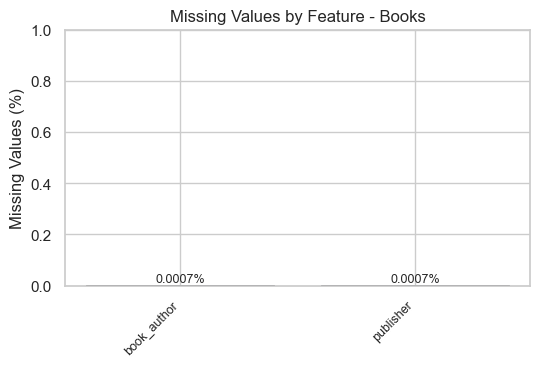

book_author    0.000737
publisher      0.000737
dtype: float64

In [33]:
missing_values_barchart(books_df,"Books")

In [36]:
books_df[books_df['book_author'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [35]:
books_df[books_df['publisher'].isnull()]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [85]:
books_df[books_df["publisher"].str.contains("Mundania", case=False, na=False)]

,isbn,book_title,book_author,year_of_publication,publisher
86893,1594260516,Not Without Anna,Vicki M. Taylor,2004,Mundania Press LLC
224597,1594260133,Single White Psychopath Seeks Same,Jeff Strand,2003,Mundania Press LLC
250688,1594260265,Legacy Of The Black Dragon,Julie D'Arcy,2004,Mundania Press LLC


### **3.1.3. Unique Values Information**

### Book Metadata Overview

The dataset contains **271,360 books**, each described by several key attributes. All attributes are object type. Here’s what we can observe:

- **`isbn`** – Every book has a unique ISBN, which makes it a perfect **unique identifier** for our dataset. 
- **`book_title`** – There are **242,135 unique titles** (about **89%** of total entries). This means most titles are unique, though some duplicates exist — likely due to **different editions or reissues** of the same book.  
- **`book_author`** – Around **102,022 unique authors** are present, meaning each author has, on average, **2–3 books** in the dataset.  
- **`publisher`** – Only **16,807 unique publishers** appear, or roughly **6%** of entries. This makes sense, since **many books come from the same publisher**.  
- **`year_of_publication`** – There are just **202 distinct years**, which is expected because **many books share the same publication year**.

---

Overall, the dataset shows good consistency, **ISBNs are unique**, while other fields naturally repeat due to multiple books by the same authors, publishers, or publication years.


In [48]:
cat_cols_books, int_cols_books, float_cols_books = get_column_types(books_df)

Categorical variables:
['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher']

Integer variables:
[]

Real (float) variables:
[]


In [49]:
unique_values(books_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,isbn,271360,271360,100.00
1,book_title,242135,271360,89.23
2,book_author,102022,271360,37.60
3,publisher,16807,271360,6.19
4,year_of_publication,202,271360,0.07


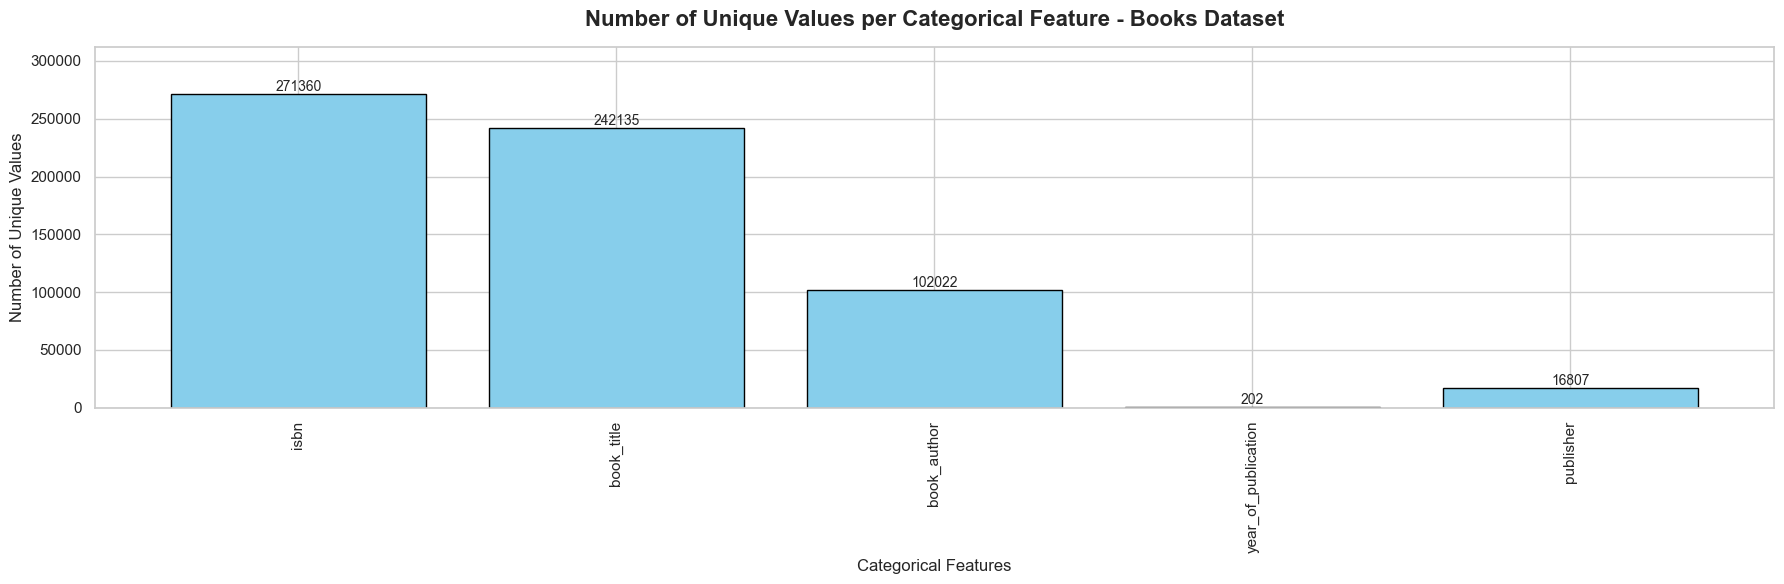

In [50]:
plot_number_of_unique_values(books_df,cat_cols_books,"Books Dataset")

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)


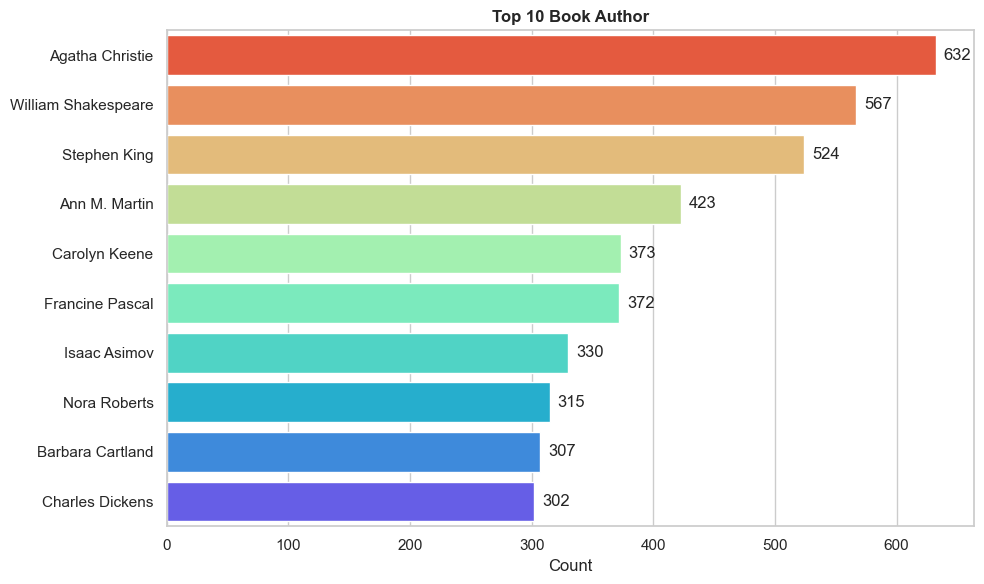

In [81]:
plot_top_categories(books_df, 'book_author', top_n=10, orientation='h', palette='rainbow_r')

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)


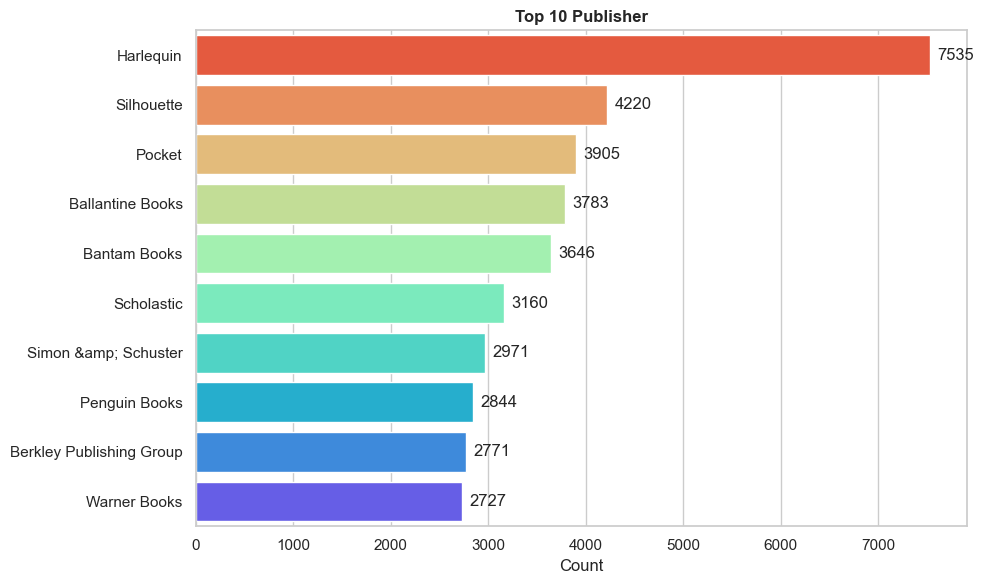

In [83]:
plot_top_categories(books_df, 'publisher', top_n=10, orientation='h', palette='rainbow_r')

# **3.2. Ratings Dataset**

### **3.2.1. Basic Information**

In [15]:
original_ratings_df = ratings_df

Our ratings dataset contains three columns: `user_id`, `isbn`, and `book_rating`, with approximately **1,149,780 entries**.  
There are **no missing values**. The `user_id` column is just an identifier, so statistics like mean or standard deviation are not meaningful.

The `book_rating` column ranges from **0** (book read but not rated) to **10**, with a **mean of 2.87** and a **standard deviation of 3.85**, indicating high variability.  
About **50% of ratings are 0** and **75% are below 7**, showing a **sparse ratings matrix** typical of recommendation datasets.

**Data types:**
- `isbn` → categorical  
- `user_id` → integer  
- `book_rating` → integer  

**Unique values:**
- `isbn`: 340,556 (~30%)  
- `user_id`: 105,283 (~9%)  
- `book_rating`: 11 (0–10)


In [16]:
ratings_df.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings_df.describe()

,user_id,book_rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### **3.2.2. Missing Values Information**

Rating Dataframe has NO missing values!

In [37]:
ratings_df.isna().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [38]:
na_counts_ratings = ratings_df.isna().sum().reset_index()
na_counts_ratings.columns = ['Feature', 'MissingValues']

In [39]:
print(f"{na_counts_ratings}")

       Feature  MissingValues
0      user_id              0
1         isbn              0
2  book_rating              0


In [40]:
get_missing_value_summary(ratings_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,user_id,int64,1149780,0,1149780,0.0
1,isbn,object,1149780,0,1149780,0.0
2,book_rating,int64,1149780,0,1149780,0.0


### **3.2.3. Unique Values Information**

In [51]:
cat_cols_ratings, int_cols_ratings, float_cols_ratings = get_column_types(ratings_df)

Categorical variables:
['isbn']

Integer variables:
['user_id', 'book_rating']

Real (float) variables:
[]


In [52]:
unique_values(ratings_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,isbn,340556,1149780,29.62
1,user_id,105283,1149780,9.16
2,book_rating,11,1149780,0.00


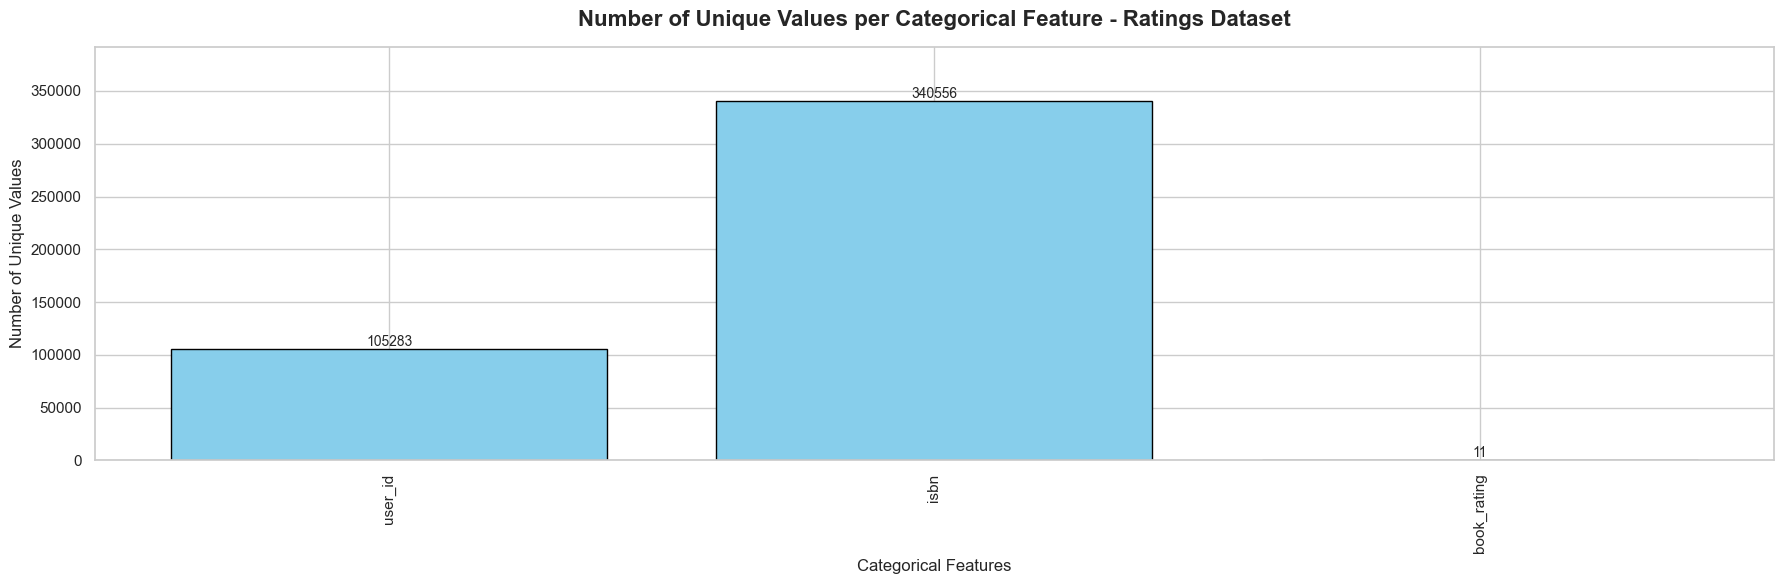

In [53]:
plot_number_of_unique_values(ratings_df,ratings_df.columns,"Ratings Dataset")

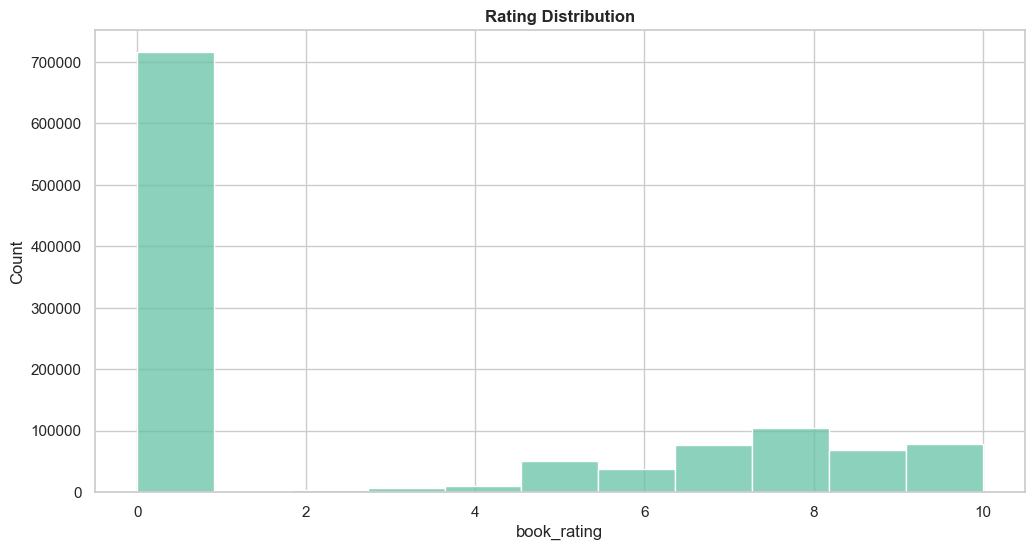

In [65]:
plot_histogram(ratings_df, 'book_rating', bins=11, title='Rating Distribution')

# **3.3. Users Dataset**

### **3.3.1. Basic Information**

In [19]:
original_users_df = users_df

In [20]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


We start by preprocessing the `location` column in the user dataset.  
User-entered locations are often messy — with typos, alternate spellings, subregions, or single-entry countries.  
Our goal is to **standardize and simplify** these values.

---

###  Location Preprocessing Functions

- **`split_location(df)`**  
  Splits the `location` column into `city`, `state`, and `country`, trims whitespace, and fills missing values with `'unknown'`.

- **`clean_country(df, country_mapping, region_mapping)`**  
  Standardizes country names, groups rare countries into `'other'`, removes quotes and empty strings, maps each country to a region, and drops the original `country` column.

- **`clean_city(df, top_n=50)`**  
  Cleans city names, replaces invalid or missing entries with `'unknown'`, keeps only the top *N* frequent cities, labels the rest as `'other'`, and drops the original column.

- **`clean_state(df, top_n=50)`**  
  Similar to `clean_city`, but applied to states.

- **`preprocess_location(df, ...)`**  
  Runs all the above steps and returns cleaned columns:  
  `city_clean`, `state_clean`, `country_clean`, and `region`.

---

Overall, this process transforms messy location data into standardized, manageable categories suitable for **analysis or modeling**.


In [21]:
country_mapping = {
    # USA variants
    'usa': 'usa', 'u.s.a.': 'usa', 'us': 'usa', 'america': 'usa', 'u.s.a': 'usa',
    'united states': 'usa', 'united states of america': 'usa', 'united state': 'usa', 
    'united statea': 'usa', 'u.s. of a.': 'usa', 'u.s>': 'usa', 'uusa': 'usa',
    'usa now': 'usa', 'good old usa !': 'usa', 'good old u.s.a.': 'usa',
    'usa (currently living in england)': 'usa', 'usa"': 'usa', 'us virgin islands': 'usa',
    'american samoa': 'usa', 'ca': 'usa', 'nyc': 'usa', 'fl': 'usa', 'tx': 'usa',
    'arizona': 'usa', 'california': 'usa', 'new york': 'usa', 'massachusetts': 'usa',
    'ohio': 'usa', 'colorado': 'usa', 'michigan': 'usa', 'virginia': 'usa',
    'washington': 'usa', 'missouri': 'usa', 'pennsylvania': 'usa', 'illinois': 'usa',
    'nevada': 'usa', 'florida': 'usa', 'north carolina': 'usa', 'south carolina': 'usa',
    'west virginia': 'usa', 'maine': 'usa', 'minnesota': 'usa', 'montana': 'usa',
    'new jersey': 'usa', 'hawaii': 'usa', 'alaska': 'usa', 'texas': 'usa',
    'louisiana': 'usa', 'oh': 'usa', 'nj': 'usa', 'ny': 'usa', 'va': 'usa',
    'pa': 'usa', 'arizona': 'usa', 'florida': 'usa', 'mi': 'usa', 'california': 'usa',
    'anystate': 'usa', 'everywhere and anywhere': 'usa', 'land of the free': 'usa',
    
    # UK variants
    'uk': 'united kingdom', 'u.k.': 'united kingdom', 'england': 'united kingdom',
    'england uk': 'united kingdom', 'united kingdom': 'united kingdom', 'scotland': 'united kingdom',
    'wales': 'united kingdom', 'northern ireland': 'united kingdom',
    
    # Germany variants
    'germany': 'germany', 'deutschland': 'germany', 'germay': 'germany', 'deutsches reich': 'germany',
    'baden-wuerttemberg': 'germany', 'baden-württemberg': 'germany', 'hessen': 'germany',
    'rheinland-pfalz': 'germany', 'bayern': 'germany', 'berlin': 'germany',
    
    # Spain variants
    'spain': 'spain', 'españa': 'spain', 'espana': 'spain', 'espã±a': 'spain', 
    'spain"': 'spain', 'andalucia': 'spain', 'catalunya': 'spain', 'catalonia': 'spain',
    'pais vasco': 'spain', 'valtesse': 'spain', 'laos': 'spain', 'aragon': 'spain',
    
    # Italy variants
    'italy': 'italy', 'italia': 'italy', 'l`italia': 'italy', 'italien': 'italy',
    'italy"': 'italy', 'emilia romagna': 'italy', 'lazio': 'italy', 'sicilia': 'italy',
    'veneto': 'italy', 'toscana': 'italy', 'piemonte': 'italy', 'roma': 'italy', 'milano': 'italy',
    'prov. di milano': 'italy', 'trentino alto adige': 'italy', 'roma': 'italy',
    
    # France variants
    'france': 'france', 'la france': 'france', 'france"': 'france', 'ile de france': 'france',
    'bourgogne': 'france', 'alsace': 'france',
    
    # Portugal variants
    'portugal': 'portugal', 'portugal"': 'portugal', 'alentejo': 'portugal',
    'lisboa': 'portugal', 'porto': 'portugal', 'coimbra': 'portugal', 'azores': 'portugal',
    
    # China variants
    'china': 'china', 'p.r.china': 'china', 'p.r. china': 'china', 'people`s republic of china': 'china',
    'china people`s republic': 'china', 'cn': 'china', 'china"': 'china', 'beijing': 'china',
    'shanghai': 'china', 'liaoning': 'china', 'shanxi province': 'china', 'hubei province': 'china',
    'hunan': 'china', 'guangdong': 'china', 'shandong province': 'china', 'hebei': 'china',
    
    # Australia variants
    'australia': 'australia', 'autralia': 'australia', 'australii': 'australia',
    'australian capital territory': 'australia', 'new south wales': 'australia', 'nsw': 'australia',
    'victoria': 'australia', 'queensland': 'australia', 'western australia': 'australia',
    'south australia': 'australia', 'tasmania': 'australia', 'canberra': 'australia',
    
    # India variants
    'india': 'india', 'india"': 'india', 'maharashtra': 'india', 'maharastra': 'india',
    'jharkhand': 'india', 'punjab': 'india', 'tamil nadu': 'india', 'indiai': 'india',
    
    # Japan variants
    'japan': 'japan', 'japan military': 'japan', 'japan"': 'japan', 'tokyo': 'japan',
    'osaka': 'japan', 'seoul korea': 'japan', 'shizuoka pref.': 'japan',
    
    # Misc / Other countries (examples)
    'canada': 'canada', 'british columbia': 'canada', 'ontario': 'canada', 'newfoundland': 'canada',
    'mexico': 'mexico', 'mexico"': 'mexico', 'ciudad de mexico': 'mexico', 'nuevo leon': 'mexico',
    'venezuela': 'venezuela', 'venezuela"': 'venezuela', 'brazil': 'brazil', 'brasil': 'brazil',
    'brazil"': 'brazil', 'argentina': 'argentina', 'la argentina': 'argentina', 'argentina"': 'argentina',
    'germany"': 'germany', 'deutschland"': 'germany', 'spain"': 'spain',
    'south korea': 'south korea', 'south korea"': 'south korea', 'korea': 'south korea', 's.corea': 'south korea',
    
    # Catch all N/A or unknown
    'n/a': 'unknown', 'n/a"': 'unknown', 'none': 'unknown', 'unknown': 'unknown', '"': 'unknown', '-': 'unknown',
    '.': 'unknown', '*': 'unknown',
}

In [22]:
region_mapping = {
    # North America
    'usa': 'North America',
    'canada': 'North America',
    'mexico': 'North America',
    'bahamas': 'North America',
    'puerto rico': 'North America',
    'bermuda': 'North America',
    'dc': 'North America',
    'oregon': 'North America',  # US state
    'u.s.a': 'North America',
    
    # Central America & Caribbean
    'costa rica': 'Central America',
    'panama': 'Central America',
    'guatemala': 'Central America',
    'jamaica': 'Caribbean',
    'trinidad and tobago': 'Caribbean',
    'dominican republic': 'Caribbean',
    'grenada': 'Caribbean',
    'barbados': 'Caribbean',
    
    # South America
    'brazil': 'South America',
    'argentina': 'South America',
    'chile': 'South America',
    'colombia': 'South America',
    'peru': 'South America',
    'venezuela': 'South America',
    'bolivia': 'South America',
    'uruguay': 'South America',
    'ecuador': 'South America',
    'paraguay': 'South America',
    'urugua': 'South America',  # typo
    
    # Europe
    'united kingdom': 'Europe',
    'germany': 'Europe',
    'spain': 'Europe',
    'italy': 'Europe',
    'france': 'Europe',
    'portugal': 'Europe',
    'netherlands': 'Europe',
    'switzerland': 'Europe',
    'sweden': 'Europe',
    'finland': 'Europe',
    'belgium': 'Europe',
    'ireland': 'Europe',
    'poland': 'Europe',
    'greece': 'Europe',
    'romania': 'Europe',
    'croatia': 'Europe',
    'slovakia': 'Europe',
    'czech republic': 'Europe',
    'russia': 'Europe/Asia',
    'yugoslavia': 'Europe',
    'slovenia': 'Europe',
    'luxembourg': 'Europe',
    'hungary': 'Europe',
    'iceland': 'Europe',
    'andorra': 'Europe',
    'ukraine': 'Europe',
    'lithuania': 'Europe',
    'latvia': 'Europe',
    'malta': 'Europe',
    'albania': 'Europe',
    'macedonia': 'Europe',
    'cyprus': 'Europe',
    'belarus': 'Europe',
    'estonia': 'Europe',
    'austria': 'Europe',
    'austria"': 'Europe',  # in case of trailing quotes
    
    # Asia
    'china': 'Asia',
    'japan': 'Asia',
    'south korea': 'Asia',
    'taiwan': 'Asia',
    'hong kong': 'Asia',
    'india': 'Asia',
    'malaysia': 'Asia',
    'singapore': 'Asia',
    'philippines': 'Asia',
    'indonesia': 'Asia',
    'pakistan': 'Asia',
    'iran': 'Asia',
    'thailand': 'Asia',
    'vietnam': 'Asia',
    'nepal': 'Asia',
    'kazakhstan': 'Asia',
    'afghanistan': 'Asia',
    'brunei': 'Asia',
    'u.a.e': 'Middle East',
    'united arab emirates': 'Middle East',
    'qatar': 'Middle East',
    'kuwait': 'Middle East',
    'bahrain': 'Middle East',
    'oman': 'Middle East',
    'iraq': 'Middle East',
    'sri lanka': 'Asia',
    'burma': 'Asia',
    
    # Africa
    'south africa': 'Africa',
    'ghana': 'Africa',
    'egypt': 'Africa',
    'algeria': 'Africa',
    'kenya': 'Africa',
    'zimbabwe': 'Africa',
    'ethiopia': 'Africa',
    'mozambique': 'Africa',
    'benin': 'Africa',
    'morocco': 'Africa',
    'mauritius': 'Africa',
    
    # Oceania
    'australia': 'Oceania',
    'new zealand': 'Oceania',
    'fiji': 'Oceania',
    
    # Other / Unknown / Misc
    'unknown': 'Unknown',
    'other': 'Unknown',
    'antarctica': 'Other',
    'east africa': 'Africa',
    'caribbean sea': 'Other',
    'euskal herria': 'Europe',  # Basque Country (Spain/France)
}


In [23]:
users_df = preprocess_location(users_df,country_mapping=country_mapping,region_mapping=region_mapping,top_cities= 50,top_states= 50)

In [24]:
users_df = users_df.drop(columns="location")

### User Description

The dataset includes **278,858 total users**, but only **168,096 have a recorded age** — meaning around **110,000 users didn’t provide their age**.

The **average user ID** (139,429.5) doesn’t carry much meaning since it’s just an identifier.  
The **average age** is about **35 years**, with a **standard deviation of roughly 14 years**, suggesting a fairly wide age spread among users.

Looking at the distribution:
- The **youngest recorded age is 0**, which is clearly an invalid or missing entry.  
- **25% of users are younger than 24**, and **half are younger than 32**.  
- **75% of users are younger than 44**, meaning most users fall between their mid-20s and mid-40s.  
- The **maximum recorded age is 244**, which is obviously an outlier or data error.

Overall, the age data contains some missing and unrealistic values, but most users are in the **24–44 age range**, with an average age around **35**.


In [25]:
users_df.head()

,user_id,age,country_clean,region,city_clean,state_clean
0,1,NaN,usa,North America,other,new york
1,2,18.0,usa,North America,other,california
2,3,NaN,russia,Europe/Asia,other,other
3,4,17.0,portugal,Europe,other,other
4,5,NaN,united kingdom,Europe,other,other


In [26]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        278858 non-null  int64  
 1   age            168096 non-null  float64
 2   country_clean  278858 non-null  object 
 3   region         278858 non-null  object 
 4   city_clean     278858 non-null  object 
 5   state_clean    278858 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


In [27]:
users_df.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### **3.3.2. Missing Values Information**

Most columns are complete, except for `age`, which has a significant number of missing entries.

In [41]:
users_df.isna().sum()

user_id               0
age              110762
country_clean         0
region                0
city_clean            0
state_clean           0
dtype: int64

In [42]:
na_counts_users = users_df.isna().sum().reset_index()
na_counts_users.columns = ['Feature', 'MissingValues']

In [43]:
print(f"{na_counts_users}")

         Feature  MissingValues
0        user_id              0
1            age         110762
2  country_clean              0
3         region              0
4     city_clean              0
5    state_clean              0


In [44]:
get_missing_value_summary(users_df)

,Column,Dtype,TotalValues,MissingValues,NonMissingValues,MissingPercent
0,user_id,int64,278858,0,278858,0.000000
1,age,float64,278858,110762,168096,39.719857
2,country_clean,object,278858,0,278858,0.000000
3,region,object,278858,0,278858,0.000000
4,city_clean,object,278858,0,278858,0.000000
5,state_clean,object,278858,0,278858,0.000000


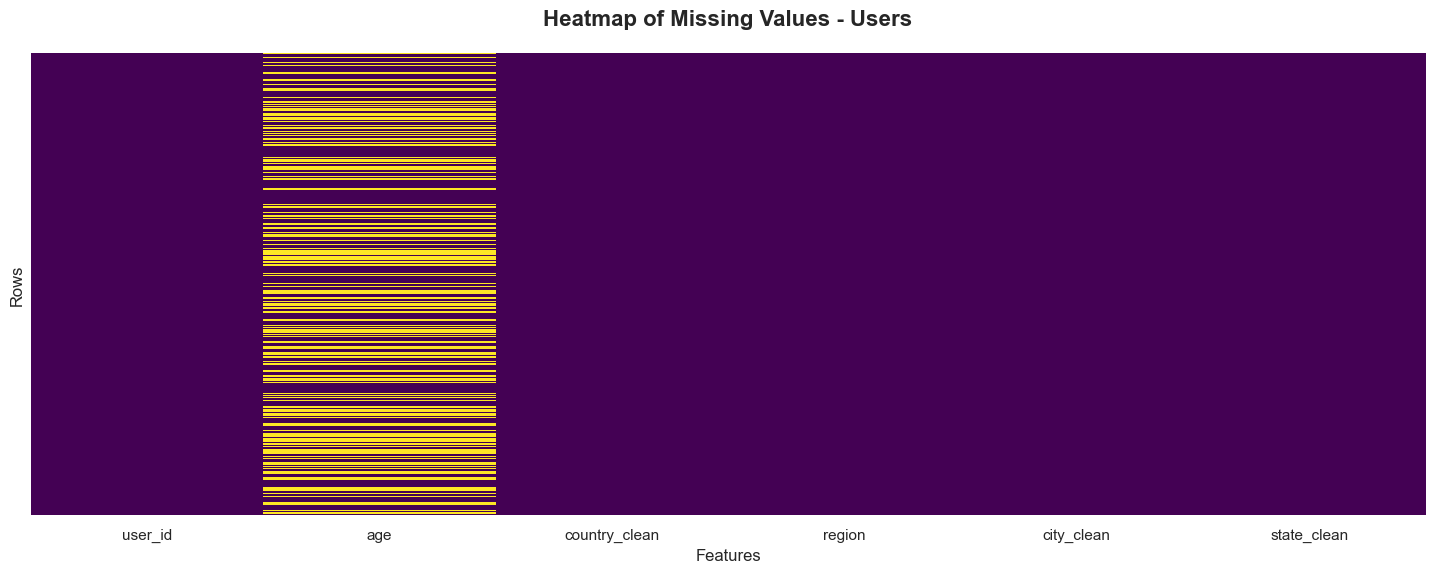

In [45]:
missing_values_heatmap(users_df,"Users")

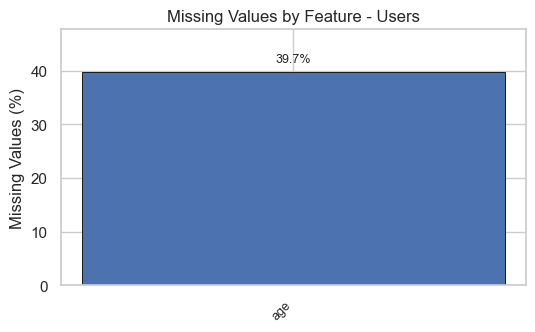

age    39.719857
dtype: float64

In [46]:
missing_values_barchart(users_df,"Users")

In [47]:
users_df[users_df['age'].isnull()]

,user_id,age,country_clean,region,city_clean,state_clean
0,1,NaN,usa,North America,other,new york
2,3,NaN,russia,Europe/Asia,other,other
4,5,NaN,united kingdom,Europe,other,other
6,7,NaN,usa,North America,washington,other
7,8,NaN,canada,North America,other,ontario
...,...,...,...,...,...,...
278849,278850,NaN,italy,Europe,other,lombardia
278853,278854,NaN,usa,North America,portland,oregon
278855,278856,NaN,canada,North America,other,ontario
278856,278857,NaN,usa,North America,other,tennessee


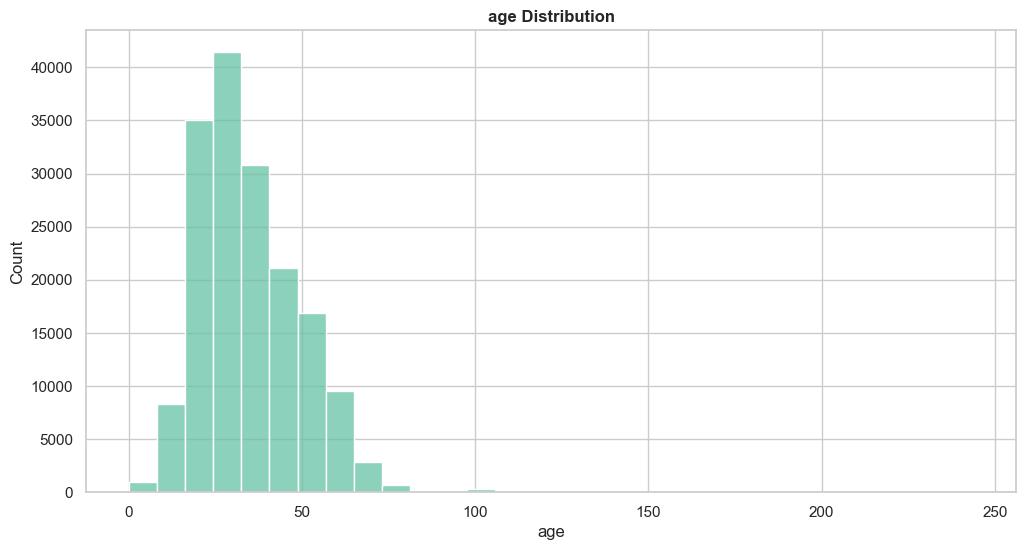

In [64]:
plot_histogram(users_df, 'age', bins=30, title='age Distribution')

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=column, data=df, palette=palette)


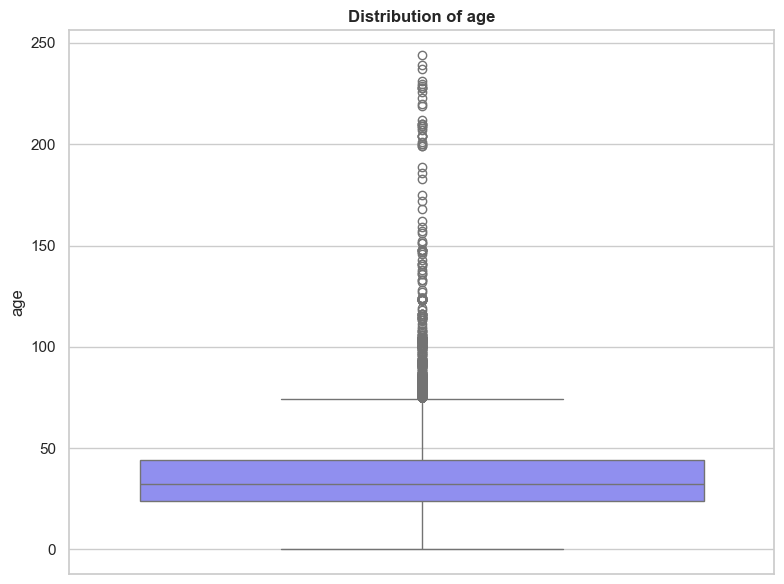

<Axes: title={'center': 'Distribution of age'}, ylabel='age'>

In [66]:
plot_boxplot(users_df, 'age', title='Distribution of age', ylabel='age', palette='cool')

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=by, y=column, data=df, palette=palette)


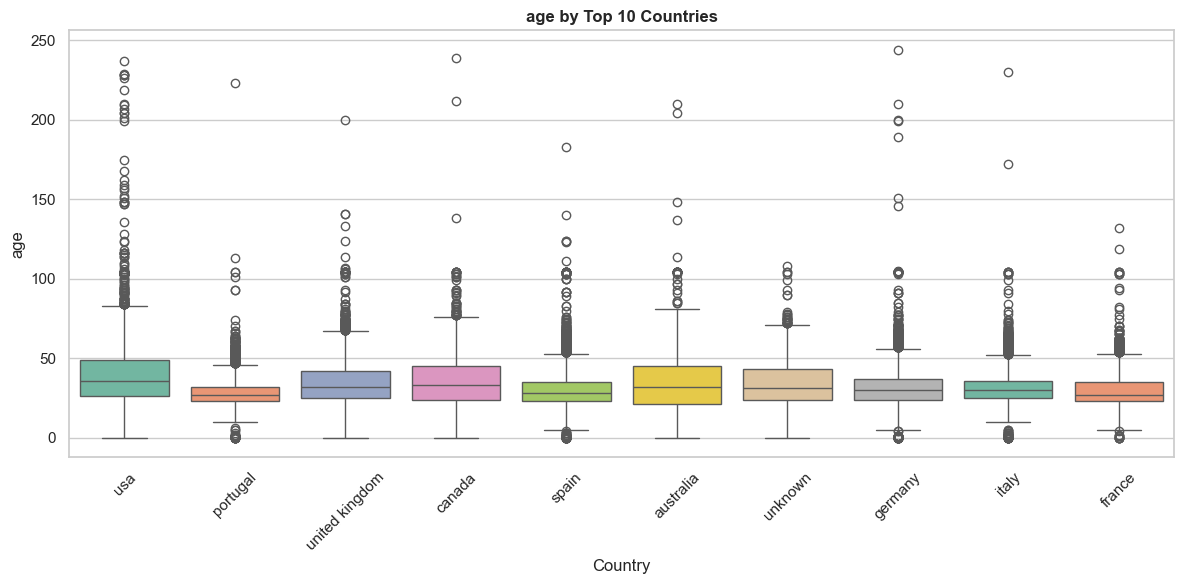

<Axes: title={'center': 'age by Top 10 Countries'}, xlabel='Country', ylabel='age'>

In [67]:
# Get top 10 countries by count
top_countries = users_df['country_clean'].value_counts().nlargest(10).index

# Filter the DataFrame
df_top10 = users_df[users_df['country_clean'].isin(top_countries)]

# Plot only the top 10 countries
plot_boxplot(
    df_top10, 
    column='age', 
    by='country_clean', 
    title='age by Top 10 Countries', 
    ylabel='age', 
    xlabel='Country', 
    palette='Set2', 
    rotate_xticks=True, 
    figsize=(12,6)
)

### **3.3.3. Unique Values Information**

- `user_id` is fully unique (100%), serving as a unique identifier for each user.  
- `age` has 165 unique values (~0.06%), indicating outliers.  
- `country_clean` has 131 unique entries (~0.05%), `city_clean` 51 (~0.02%), and `state_clean` 50 (~0.02%).  
- `region` is the least varied with only 13 unique values (~0.00%).  

In [55]:
cat_cols_users, int_cols_users, float_cols_users = get_column_types(users_df)

Categorical variables:
['country_clean', 'region', 'city_clean', 'state_clean']

Integer variables:
['user_id']

Real (float) variables:
['age']


In [56]:
unique_values(users_df)

,Column,UniqueValues,TotalValues,UniquePercent
0,user_id,278858,278858,100.00
1,age,165,278858,0.06
2,country_clean,131,278858,0.05
3,city_clean,51,278858,0.02
4,state_clean,50,278858,0.02
5,region,13,278858,0.00


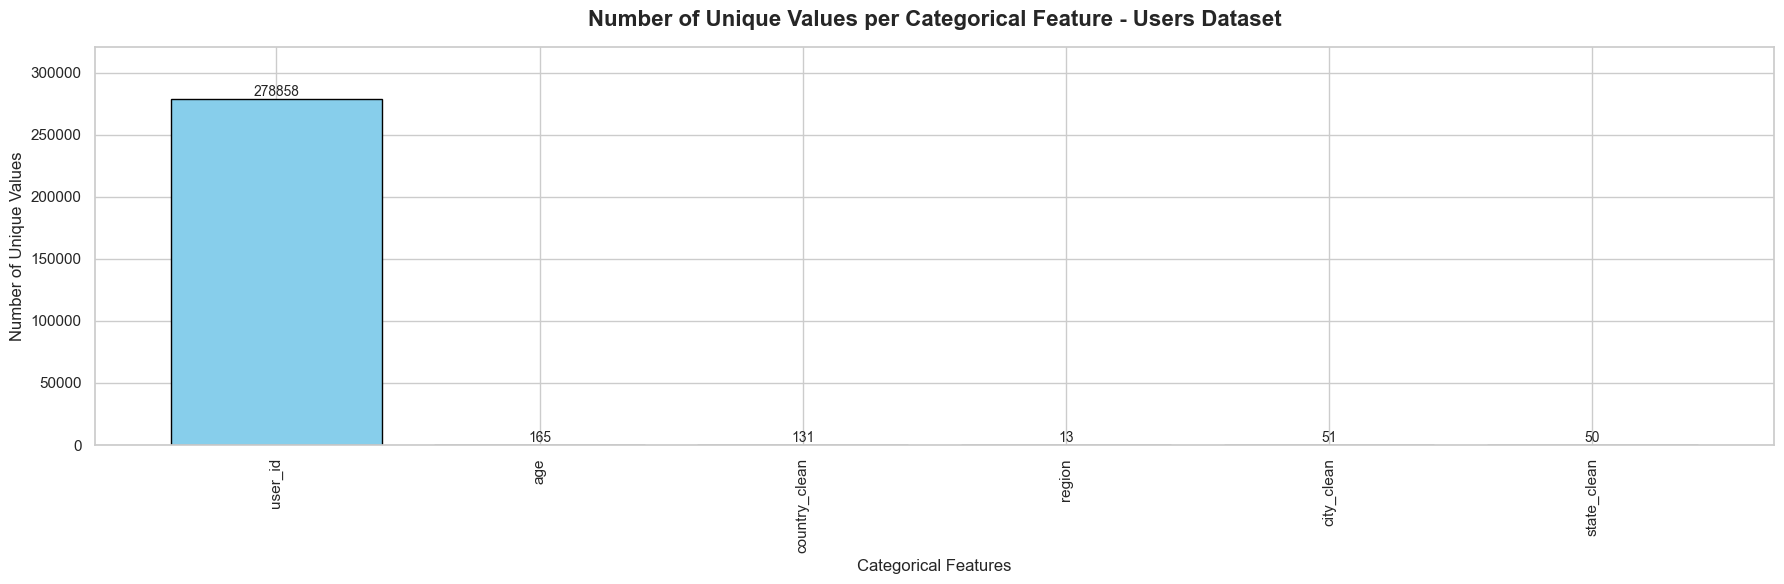

In [57]:
plot_number_of_unique_values(users_df,users_df.columns,"Users Dataset")

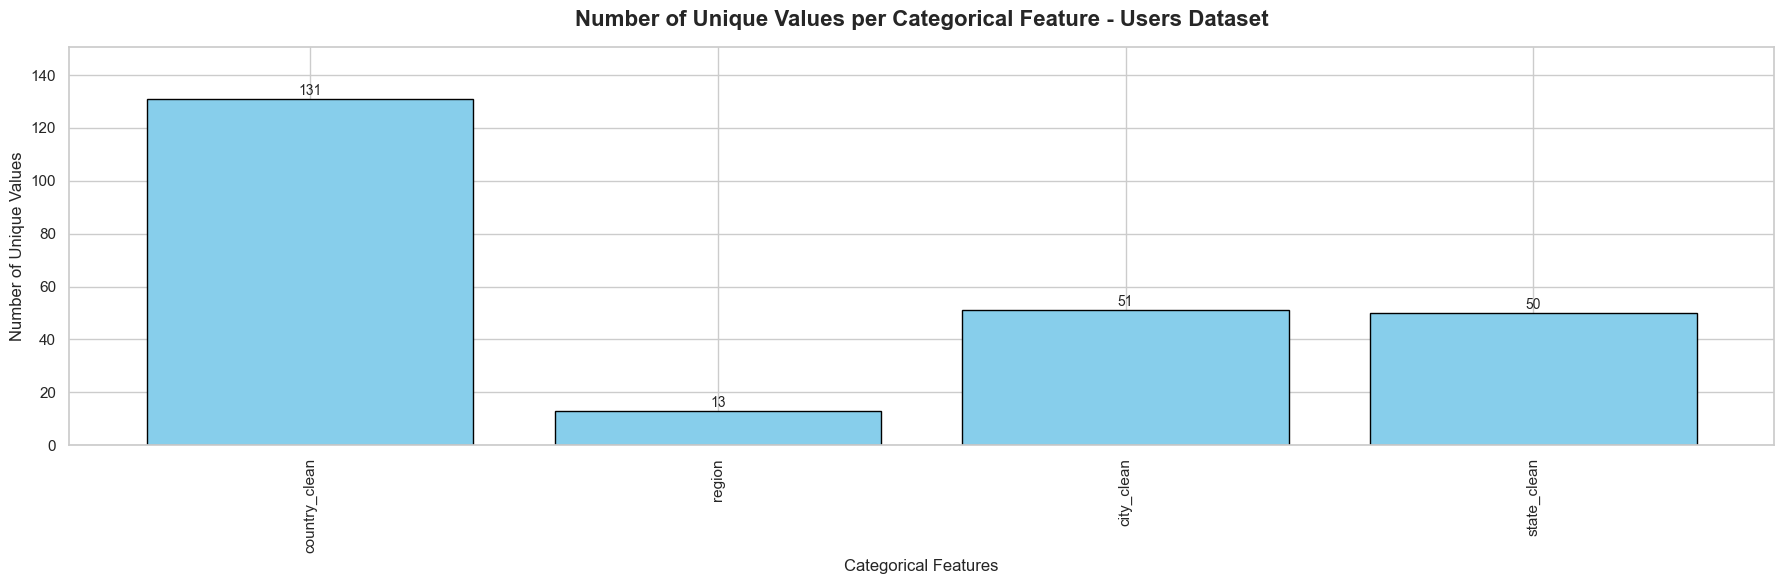

In [58]:
plot_number_of_unique_values(users_df,cat_cols_users,"Users Dataset")

### **3.3.3. Location Information**

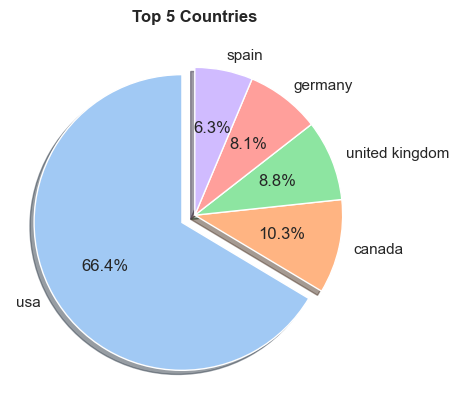

In [70]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['country_clean'].value_counts())) - 1)  # highlight first slice

users_df['country_clean'].value_counts().iloc[:5].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Countries', fontweight='bold')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_26264\3364717479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country_clean', data=users_df,


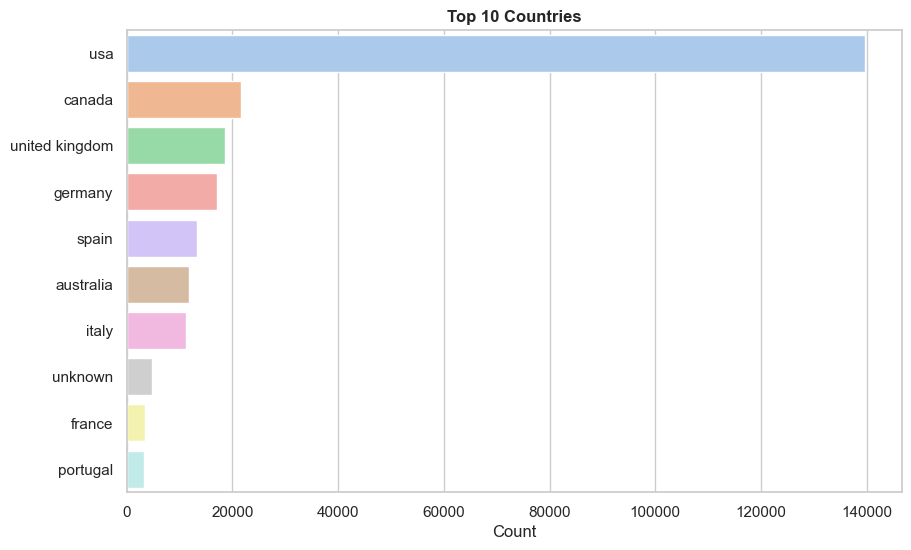

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(y='country_clean', data=users_df,
              order=users_df['country_clean'].value_counts().iloc[:10].index,
              palette='pastel')
plt.title('Top 10 Countries', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

In [75]:
users_df['city_clean'].value_counts()

city_clean
other            223321
london             4105
barcelona          2664
toronto            2342
madrid             1933
sydney             1884
portland           1869
melbourne          1863
vancouver          1699
chicago            1566
seattle            1541
new york           1445
milano             1390
san diego          1331
berlin             1306
ottawa             1303
san francisco      1300
houston            1241
paris              1189
roma               1045
austin             1044
los angeles        1042
calgary            1026
hamburg            1003
victoria            874
manchester          838
lisboa              803
singapore           801
christchurch        797
brisbane            792
rome                769
perth               743
edmonton            743
st. louis           726
tucson              685
philadelphia        675
adelaide            665
albuquerque         661
montreal            657
brooklyn            638
richmond            637
dalla

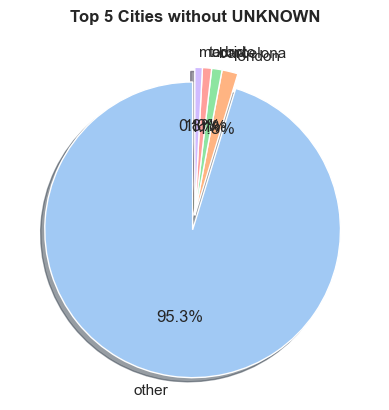

In [73]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['city_clean'].value_counts())) - 1)  # highlight first slice

users_df['city_clean'].value_counts().iloc[:5].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Cities without UNKNOWN', fontweight='bold')
plt.ylabel('')
plt.show()

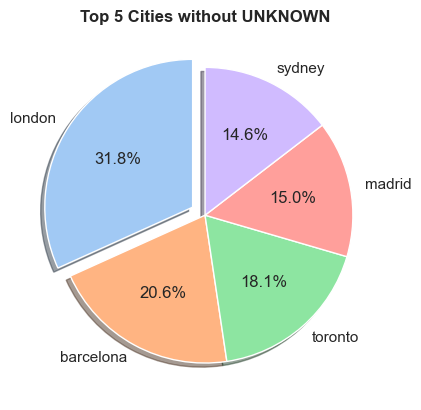

In [76]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['city_clean'].value_counts())) - 1)  # highlight first slice

users_df['city_clean'].value_counts().iloc[1:6].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Cities without UNKNOWN', fontweight='bold')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_26264\2677712999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city_clean', data=users_df,


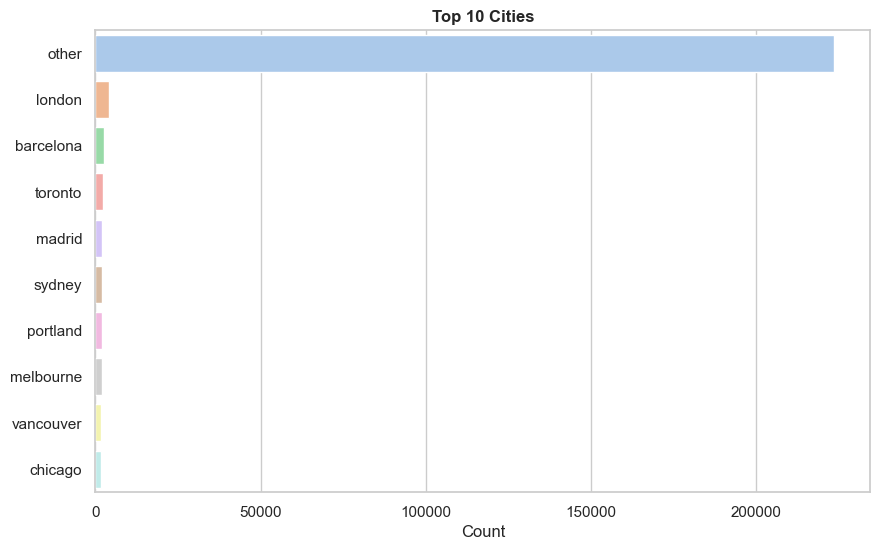

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(y='city_clean', data=users_df,
              order=users_df['city_clean'].value_counts().iloc[:10].index,
              palette='pastel')
plt.title('Top 10 Cities', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_26264\387353821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city_clean', data=users_df,


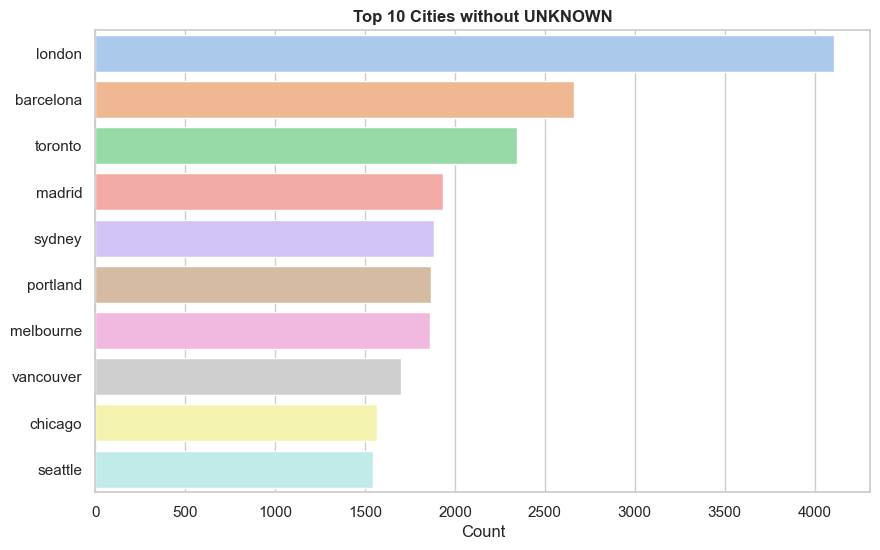

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(y='city_clean', data=users_df,
              order=users_df['city_clean'].value_counts().iloc[1:11].index,
              palette='pastel')
plt.title('Top 10 Cities without UNKNOWN', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

# **4. Data Preparation**

# 4.1. Data Cleaning

In [ ]:
books_df.head()

### 4.1.1. Removing Outliers

### 4.1.1.1. USERS DATAFRAME

In [ ]:
# Explicitly remove impossible ages
users_df.loc[(users_df['age'] <= 5) | (users_df['age'] > 99), 'age'] = np.nan

lower_bound = Q1 - 1.5*IQR = 24 - 30 = -6, leaves a lot of ages 0
upper_bound = Q3 + 1.5*IQR = 44 + 30 = 74, too low

In [ ]:
#Q1 = users_df['age'].quantile(0.25)
#Q3 = users_df['age'].quantile(0.75)
#IQR = Q3 - Q1

# Replace extreme outliers with NaN
#users_df.loc[(users_df['age'] < Q1 - 1.5*IQR) | (users_df['age'] > Q3 + 1.5*IQR), 'age'] = np.nan

In [ ]:
plot_boxplot(users_df, 'age', title='Distribution of age', ylabel='age', palette='cool')

In [ ]:
plot_histogram(users_df,"age",bins = 30, title= "Histogram of age after removing outliers")

# 4.1.2. Imputing NaN Values

### 4.1.2.1. USERS DATAFRAME

In [ ]:
median = users_df['age'].median()
std = users_df['age'].std()
nulls = users_df['age'].isna().sum()

In [ ]:
# Generate random ages from a normal distribution
random_age = np.random.normal(loc=median, scale=std, size=nulls)
random_age = np.clip(random_age, 5, 100)  # limit to plausible range

In [ ]:
# Fill NaN with these random ages
users_df.loc[users_df['age'].isna(), 'age'] = random_age.round().astype(int)

In [ ]:
get_missing_value_summary(users_df)

#### 4.1.2.2. BOOKS DATAFRAME

In [ ]:
books_df[books_df["publisher"].str.contains("Mundania", case=False, na=False)]

In [ ]:
books_df[books_df["book_title"] == "Tyrant Moon"]

Google search

In [ ]:
books_df.loc[books_df["book_title"]=="Tyrant Moon","publisher"] = "Mundania Press LLC"

In [ ]:
books_df[books_df["publisher"].isnull()]

In [ ]:
books_df.isna().sum()

In [ ]:
books_df[books_df["publisher"].str.contains("Random House Publishing", case=False, na=False)]

In [ ]:
books_df.loc[books_df["book_title"]=="Finders Keepers","publisher"] = "Random House Publishing Group"

In [ ]:
books_df.isna().sum()

In [ ]:
books_df[books_df["book_author"].isnull()]

In [ ]:
books_df.loc[books_df['isbn'] == '0751352497', 'book_author'] = 'Dorling Kindersley Publishing Staff'
books_df.loc[books_df['isbn'] == '9627982032', 'book_author'] = 'Credit Suisse'

In [ ]:
books_df.loc[books_df['book_author'].isna(), ['isbn', 'book_title', 'book_author']]

Some values appear to be string (type is object not int)

In [ ]:
books_df["year_of_publication"]

In [ ]:
books_df["year_of_publication"].apply(type).value_counts()

we are seeing 65,000+ strings but only 3 “bad” rows when we check for non-digits. most of those strings look like numbers "1998"
"2003"
"0"

In [ ]:
books_df[~books_df["year_of_publication"].apply(lambda x: str(x).isdigit())]

year_of_publication column is a mess: it contains integers, strings (like '2000'), non-year strings (publisher names such as "DK Publishing Inc"), and impossible values (0, 2030, 2050, 1806, 1378, etc.).

In [ ]:
books_df["year_of_publication"].unique()

DK Publishing Inc and Gallimard

In [ ]:
books_df[books_df["year_of_publication"] == "Gallimard"]

In [ ]:
books_df[books_df["year_of_publication"] == "DK Publishing Inc"]

convert the column to numeric using errors='coerce', which turns invalid values into NaN

In [ ]:
books_df["year_of_publication"] = pd.to_numeric(books_df["year_of_publication"], errors='coerce')

In [ ]:
books_df.isna().sum()

In [ ]:
books_df.loc[(books_df["year_of_publication"] < 1000) | 
             (books_df["year_of_publication"] > 2025), "year_of_publication"] = np.nan

In [ ]:
books_df["year_of_publication"].fillna(books_df["year_of_publication"].median(), inplace=True)
books_df["year_of_publication"] = books_df["year_of_publication"].astype(int)

In [ ]:
books_df.isna().sum()

In [ ]:
plot_histogram(books_df, 'year_of_publication', bins=300, title='Year of Publication Distribution')

In [ ]:
plot_histogram(books_df[books_df["year_of_publication"]>1950], 'year_of_publication', bins=50, title='Year of Publication Distribution')

In [ ]:
books_df = books_df[books_df['year_of_publication'].between(1900, 2025)]

In [ ]:
plot_histogram(books_df, 'year_of_publication', bins=30, title='Year of Publication Distribution')

In [ ]:
books_df["year_of_publication"].value_counts()

In [ ]:
year_counts = books_df["year_of_publication"].value_counts().sort_index()
year_counts = year_counts.reset_index()
year_counts.columns = ["Year", "Count"]
display(year_counts)

In [ ]:
#from IPython.display import display, HTML

#display(HTML(year_counts.to_html()))

In [ ]:
books_df.isna().sum()

In [ ]:
#books_df['image_url_l'].fillna(books_df['image_url_m'], inplace=True)

In [ ]:
books_df.isna().sum()

In [ ]:
users_df.isna().sum()

In [ ]:
ratings_df.isna().sum()

#### 4.1.2.3. RATINGS DATAFRAME

In [ ]:
ratings_df.head()

In [ ]:
ratings_df["book_rating"].apply(type).value_counts()

In [ ]:
ratings_df["isbn"].apply(type).value_counts()

In [ ]:
ratings_df["user_id"].apply(type).value_counts()

# 4.2. Feature Engineering

In [ ]:
books_df['isbn'].duplicated().sum()

In [ ]:
users_df['user_id'].duplicated().sum()

In [ ]:
books_df["isbn"].apply(type).value_counts()

In [ ]:
books_df["book_title"].apply(type).value_counts()

In [ ]:
books_df["book_author"].apply(type).value_counts()

In [ ]:
books_df["publisher"].apply(type).value_counts()

In [ ]:
books_df.info()

In [ ]:
users_df.info()

In [ ]:
ratings_df.info()

In [ ]:
ratings_df['isbn'] = ratings_df['isbn'].astype(str)
books_df['isbn'] = books_df['isbn'].astype(str)

ratings_df['user_id'] = ratings_df['user_id'].astype(int)
users_df['user_id'] = users_df['user_id'].astype(int)

In [ ]:
books_df['book_title'] = books_df['book_title'].astype(str)

In [ ]:
books_df['book_author'] = books_df['book_author'].astype(str)

In [ ]:
books_df['publisher'] = books_df['publisher'].astype(str)

In [ ]:
books_df.info()

# Merge Ratings Users

In [ ]:
users_df.shape

In [ ]:
ratings_df.shape

In [ ]:
ratings_df.info()

In [ ]:
users_ratings=pd.merge(users_df,ratings_df,on='user_id') # merging df_users with df_ratings based on user_id

In [ ]:
users_ratings.shape

In [ ]:
users_ratings.head()

Always merge and join datasets on isbn, not book_title.

Why:

isbn uniquely identifies the specific item across all tables.

book_title may not be unique (multiple editions, typos, or differences in casing).

Using book_title for merging will cause duplicates, mismatched joins, or missing records.

In [ ]:
merged_df=pd.merge(users_ratings,books_df,on='isbn') # merging  merged_df with df_books based on isbn

In [ ]:
original_merged_df = merged_df

In [ ]:
merged_df.shape

In [ ]:
merged_df.head()

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df.isnull().sum()

In [ ]:
# Aggregate mean and count of ratings per book
book_rating = (
    merged_df.groupby(['book_title', 'book_author'])['book_rating']
    .agg(count='count', mean='mean')
    .reset_index()
)

# Filter to only books with a substantial number of ratings
filtered_books = book_rating.query("count > 500").sort_values('mean', ascending=False).head(10)

# Improve the plot
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_books,
    x='mean',
    y='book_title',
    hue='book_author',
    palette='Paired',
)

# Labels and title
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Top 10 Highly Rated Books (with >500 Ratings)', fontsize=14, fontweight='bold')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
merged_df["book_rating"].value_counts()

# Feature Engineering for Content Based Approach

In [ ]:
merged_df = merged_df[merged_df['book_rating']!=0]

In [ ]:
plot_histogram(merged_df, 'book_rating', bins=10, title='Rating Distribution')

In [ ]:
plot_histogram(merged_df, 'age', bins=30, title='Age Distribution')

In [ ]:
plot_histogram(merged_df, 'year_of_publication', bins=130, title='Year of Publication')

### User Level Features

In [ ]:
# --- USER-LEVEL FEATURES ---

# Average rating given by each user
merged_df['user_avg_rating'] = merged_df.groupby('user_id')['book_rating'].transform('mean')

# Total number of ratings by each user
merged_df['user_num_ratings'] = merged_df.groupby('user_id')['book_rating'].transform('count')

# How consistent a user’s ratings are (standard deviation)
merged_df['User_rating_variability'] = merged_df.groupby('user_id')['book_rating'].transform('std')

# Create a separate dataframe for easy inspection
user_level_features = merged_df[['user_id', 'user_avg_rating', 'user_num_ratings', 'User_rating_variability']].drop_duplicates()

In [ ]:
# --- USER age GROUP FEATURE ---

# Define bins (adjustable) and labels 1–5
age_bins = [0, 18, 25, 35, 50, 100]  # covers ages up to 120
age_labels = [1, 2, 3, 4, 5]         # numeric group codes

# Create a new column
merged_df['User_age_Group'] = pd.cut(
    merged_df['age'],
    bins=age_bins,
    labels=age_labels,
    right=False  # includes the left edge (e.g., 18 goes to group 2)
).astype(int)

In [ ]:
merged_df

### Book Level Features

In [ ]:
# --- BOOK-LEVEL FEATURES ---

# Average rating per book (some books have multiple isbns)
merged_df['book_avg_rating'] = merged_df.groupby('book_title')['book_rating'].transform('mean')

# Number of ratings per book
merged_df['book_num_ratings'] = merged_df.groupby('book_title')['book_rating'].transform('count')

# Standard deviation of ratings per book (optional but insightful)
merged_df['book_rating_variability'] = merged_df.groupby('book_title')['book_rating'].transform('std')

# Optional: Book popularity score (weighted by number of ratings)
merged_df['book_popularity_score'] = merged_df['book_avg_rating'] * np.log1p(merged_df['book_num_ratings'])

# Create a distinct book-level summary DataFrame
book_level_features = merged_df[['book_title', 'book_avg_rating', 'book_num_ratings', 'book_rating_variability', 'book_popularity_score']].drop_duplicates()

In [ ]:
top_books = book_level_features.sort_values('book_num_ratings', ascending=False).head(10)
sns.barplot(x='book_num_ratings', y='book_title', data=top_books, palette='viridis')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

In [ ]:
merged_df.head()

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df['User_rating_variability'] = merged_df['User_rating_variability'].fillna(0)
merged_df['book_rating_variability'] = merged_df['book_rating_variability'].fillna(0)

In [ ]:
# --- AUTHOR-LEVEL FEATURE ---
merged_df['author_avg_rating'] = merged_df.groupby('book_author')['book_rating'].transform('mean')

# --- publisher-LEVEL FEATURE ---
merged_df['publisher_avg_rating'] = merged_df.groupby('publisher')['book_rating'].transform('mean')

# --- BOOK age FEATURE ---
# Assuming 'year_of_publication' is numeric and no future years
current_year = 2025
merged_df['book_age'] = current_year - merged_df['year_of_publication']

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df.head()

### location Based Features

In [ ]:
# --- location-BASED FEATURES ---

# Country-level average rating
merged_df['country_avg_rating'] = merged_df.groupby('country_clean')['book_rating'].transform('mean')

# region-level average rating (if region exists)
merged_df['region_avg_rating'] = merged_df.groupby('region')['book_rating'].transform('mean')

# City-level average rating (optional, more granular)
merged_df['city_avg_rating'] = merged_df.groupby('city_clean')['book_rating'].transform('mean')

# User’s bias compared to their country's average
merged_df['user_country_rating_bias'] = merged_df['user_avg_rating'] - merged_df['country_avg_rating']

# Average rating for each Book within each Country
merged_df['book_country_avg_rating'] = merged_df.groupby(['book_title', 'country_clean'])['book_rating'].transform('mean')

In [ ]:
merged_df.head()

In [ ]:
merged_df.columns

In [ ]:
# # Example for a single top-rated book
# book_name = filtered_books.iloc[0]['book_title']  # top book

# sns.set(style="whitegrid", context="talk")
# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     data=merged_df[merged_df['book_title'] == book_name],
#     x='age',
#     y='book_rating',
#     alpha=0.6
# )
# sns.regplot(
#     data=merged_df[merged_df['book_title'] == book_name],
#     x='age',
#     y='book_rating',
#     scatter=False,
#     color='red'
# )

# plt.title(f'Age vs Rating for "{book_name}"', fontsize=14, fontweight='bold')
# plt.xlabel('User Age')
# plt.ylabel('Book Rating')
# plt.tight_layout()
# plt.show()

In [ ]:
# sns.scatterplot(data=merged_df, x='age', y='user_avg_rating', alpha=0.4)
# sns.regplot(data=merged_df, x='age', y='user_avg_rating', scatter=False, color='red')
# plt.title('User Age vs Average Rating')
# plt.xlabel('Age')
# plt.ylabel('User Average Rating')
# plt.tight_layout()
# plt.show()


In [ ]:
# sns.scatterplot(data=merged_df.drop_duplicates('isbn'),
#                 x='book_popularity_score', y='book_avg_rating', alpha=0.5)
# sns.regplot(data=merged_df.drop_duplicates('isbn'),
#             x='book_popularity_score', y='book_avg_rating', scatter=False, color='red')
# plt.title('Book Popularity Score vs Average Rating')
# plt.xlabel('Book Popularity Score')
# plt.ylabel('Average Rating')
# plt.tight_layout()
# plt.show()

In [ ]:
# sns.scatterplot(data=merged_df.drop_duplicates('isbn'),
#                 x='book_age', y='book_avg_rating', alpha=0.5)
# sns.regplot(data=merged_df.drop_duplicates('isbn'),
#             x='book_age', y='book_avg_rating', scatter=False, color='red')
# plt.title('Book Age vs Average Rating')
# plt.xlabel('Book Age (years since publication)')
# plt.ylabel('Average Rating')
# plt.tight_layout()
# plt.show()


In [ ]:
merged_df["User_age_Group"].value_counts()

In [ ]:
# # Pivot for heatmap (numeric age groups)
# heatmap_data = (
#     book_age_ratings
#     .pivot(index='book_title', columns='User_age_Group', values='book_rating')
# )

# # Sort rows by one of the numeric columns (e.g., group 1)
# # Make sure the column exists before sorting
# sort_col = 1  # choose any valid numeric group from your data (1–5)
# if sort_col in heatmap_data.columns:
#     heatmap_data = heatmap_data.sort_values(by=sort_col, ascending=False)
# else:
#     # fallback: sort by overall mean if column missing
#     heatmap_data = heatmap_data.assign(mean_rating=heatmap_data.mean(axis=1)) \
#                                .sort_values('mean_rating', ascending=False) \
#                                .drop(columns='mean_rating')

# # Plot heatmap
# plt.figure(figsize=(12, 7))
# sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")

# plt.title('Average Rating by Numeric Age Group and Book', fontsize=14, fontweight='bold')
# plt.xlabel('User Age Group (numeric)')
# plt.ylabel('Book Title')
# plt.tight_layout()
# plt.show()


In [ ]:
# # Author vs AgeGroup: mean rating
# author_age = (
#     merged_df.groupby(['book_author', 'User_age_Group'])['book_rating']
#     .mean().reset_index()
# )
# heat = author_age.pivot(index='book_author', columns='User_age_Group', values='book_rating')

# # Optional: limit to top authors by number of ratings
# top_authors = merged_df.groupby('book_author')['book_rating'].count().nlargest(40).index
# heat = heat.reindex(top_authors)

# # sort by group 1 if present, otherwise by row mean
# sort_col = 1
# if sort_col in heat.columns:
#     heat = heat.sort_values(by=sort_col, ascending=False)
# else:
#     heat = heat.assign(_mean=heat.mean(axis=1)).sort_values('_mean', ascending=False).drop(columns=['_mean'])

# plt.figure(figsize=(12,8))
# sns.heatmap(heat, annot=True, fmt=".2f", linewidths=.4, cbar_kws={'label':'Avg rating'})
# plt.title('Author vs User Age Group — Average Rating')
# plt.xlabel('User Age Group')
# plt.ylabel('Author')
# plt.tight_layout()
# plt.show()


In [ ]:
# pub_age = (
#     merged_df.groupby(['publisher', 'User_age_Group'])['book_rating']
#     .mean().reset_index()
# )
# heat = pub_age.pivot(index='publisher', columns='User_age_Group', values='book_rating')

# # limit to most prolific publishers
# top_pubs = merged_df.groupby('publisher')['book_rating'].count().nlargest(30).index
# heat = heat.reindex(top_pubs)

# # sort safely
# if 1 in heat.columns:
#     heat = heat.sort_values(by=1, ascending=False)
# else:
#     heat = heat.assign(_mean=heat.mean(axis=1)).sort_values('_mean', ascending=False).drop(columns=['_mean'])

# plt.figure(figsize=(12,8))
# sns.heatmap(heat, annot=True, fmt=".2f", linewidths=.4, cbar_kws={'label':'Avg rating'})
# plt.title('Publisher vs User Age Group — Average Rating')
# plt.xlabel('User Age Group')
# plt.ylabel('Publisher')
# plt.tight_layout()
# plt.show()


In [ ]:
merged_df.head()

In [ ]:
#num_cols = ['age','user_avg_rating','user_num_ratings','User_rating_variability',
  #          'book_avg_rating','book_num_ratings','book_rating_variability',
 #           'book_popularity_score','author_avg_rating','publisher_avg_rating','book_age']
#corr = merged_df[num_cols].corr()

#plt.figure(figsize=(10,8))
#sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.3)
#plt.title('Correlation Matrix — Numeric Features')
#plt.tight_layout()
#plt.show()


In [ ]:
#country_ratings = merged_df.groupby('country_clean')['book_rating'].mean().sort_values(ascending=False).head(15)
#plt.figure(figsize=(12,6))
#sns.barplot(x=country_ratings.values, y=country_ratings.index)
#plt.title('Average Book Rating by Country')
#plt.xlabel('Average Rating')
#plt.ylabel('Country')
#plt.tight_layout()
#plt.show()

In [ ]:
#plt.figure(figsize=(8,6))
#sns.scatterplot(data=merged_df.drop_duplicates('isbn'), x='book_age', y='book_avg_rating', alpha=0.5)
#sns.regplot(data=merged_df.drop_duplicates('isbn'), x='book_age', y='book_avg_rating', scatter=False, color='red')
#plt.title('Book Age vs. Average Rating')
#plt.xlabel('Book Age (Years)')
#plt.ylabel('Average Rating')
#plt.tight_layout()
#plt.show()


### Interaction Based Features

In [ ]:
merged_df['is_high_rating'] = (merged_df['book_rating'] >= 8).astype(int)

In [ ]:
# Rank users by number of ratings
merged_df['user_activity_rank'] = merged_df['user_num_ratings'].rank(method='dense', ascending=False)

In [ ]:
scale_cols = [
    'age',
    'user_avg_rating', 'user_num_ratings', 'User_rating_variability',
    'book_avg_rating', 'book_num_ratings', 'book_rating_variability', 
    'book_popularity_score', 'book_age',
    'author_avg_rating', 'publisher_avg_rating',
    'country_avg_rating', 'region_avg_rating', 'city_avg_rating',
    'user_country_rating_bias', 'book_country_avg_rating'
]

In [ ]:
scaler = MinMaxScaler()
merged_df[scale_cols] = scaler.fit_transform(merged_df[scale_cols])

In [ ]:
merged_df[scale_cols].describe().T[['min', 'max']]

In [ ]:
merged_df

In [ ]:
merged_df.columns

# User based personalized recommendation

In [ ]:
# Count how many ratings each user has made
users_ratings_count_df = merged_df.groupby('user_id')['book_rating'].count()

print(f'Number of users: {len(users_ratings_count_df):,}')

# Filter users with at least 50 ratings
min_ratings = 50
users_with_enough_ratings_df = users_ratings_count_df[users_ratings_count_df >= min_ratings].reset_index()

print(f'Number of users with at least {min_ratings} ratings: {len(users_with_enough_ratings_df):,}')


In [ ]:
merged_df.columns

# 1. Collaborative Filtering

# 1. SELF MADE

# 1. User Based  CF - Predict a user’s rating for an item based on ratings from similar users.

for collaborative filtering (CF), you typically just need user-item interactions (like user_id, isbn, and book_rating). Metadata like book titles or user demographics aren’t directly used in standard CF models, though hybrid CF methods can incorporate them.

For collaborative filtering, you only need a few core columns — everything else is feature-engineering data useful for hybrid or content-based models later.

Collaborative filtering (CF) works purely on user–item interactions, not on metadata.
It learns similarity patterns:

users who rated similar books similarly

books rated by similar users

All those other columns (age, country, author_avg_rating, etc.) are side information.
They’re great for:

content-based recommenders,

hybrid models (CF + features),

analytics or fairness analysis,

but not for a pure CF matrix.

FOR CONTENT BASED APPROACH I AM WRITTING HERE SO I DON"T FORGET: one-hot encoding works well for columns with low cardinality, but when you have columns like isbn (149,833 unique values) or book_title (135,564), traditional one-hot encoding becomes impractical because it would create huge, sparse matrices that are both memory- and computation-heavy.

In [ ]:
# Step 1: filter active users and reasonably-rated books
min_user_ratings = 50   # Cold Start
min_book_ratings = 20   # safe default; adjust if dataset small

In [ ]:
cf_df = merged_df[['user_id', 'book_title', 'book_rating']].copy()

In [ ]:
# Compute user and book counts
user_counts = cf_df.groupby('user_id')['book_rating'].count()
book_counts = cf_df.groupby('book_title')['book_rating'].count()

In [ ]:
# Select active users and books
active_users = user_counts[user_counts >= min_user_ratings].index
active_books = book_counts[book_counts >= min_book_ratings].index

In [ ]:
# Filter dataframe
cf_df_filtered = cf_df[
    cf_df['user_id'].isin(active_users) &
    cf_df['book_title'].isin(active_books)
].copy()

print("Filtered data:", cf_df_filtered['user_id'].nunique(), "users,", 
      cf_df_filtered['book_title'].nunique(), "books,", len(cf_df_filtered), "rows")

Step 2: create a per-user train / test split so the model evaluation is realistic. Ensure every user appears in the train set (so we can learn their preferences) and also appears in test (so we can evaluate recommendations). Make the split reproducible. 

In [ ]:
import numpy as np

# Parameters
test_frac = 0.2
random_seed = 42
rng = np.random.RandomState(random_seed)

train_idxs = []
test_idxs = []

# group by user and split each user’s ratings
for user, group in cf_df_filtered.groupby('user_id'):
    idxs = group.index.tolist()
    rng.shuffle(idxs)
    
    n_test = max(1, int(round(test_frac * len(idxs))))
    test_for_user = idxs[:n_test]
    train_for_user = idxs[n_test:]
    
    # ensure user appears in train too
    if len(train_for_user) == 0 and len(test_for_user) > 1:
        train_for_user.append(test_for_user.pop())
    
    train_idxs.extend(train_for_user)
    test_idxs.extend(test_for_user)

# Create splits
train_df = cf_df_filtered.loc[train_idxs].reset_index(drop=True)
test_df = cf_df_filtered.loc[test_idxs].reset_index(drop=True)

print("Train rows:", len(train_df))
print("Test rows :", len(test_df))
print("Unique users in train:", train_df['user_id'].nunique())
print("Unique users in test :", test_df['user_id'].nunique())

In [ ]:
# 1) Identify items in train & test
train_items = set(train_df['book_title'].unique())
test_items  = set(test_df['book_title'].unique())

# 2) Find items that are in test but not in train
unseen_in_train = test_items - train_items
len(unseen_in_train), list(unseen_in_train)[:10]

In [ ]:
# 3) Move one example of each unseen item from test_df -> train_df
moved_count = 0
rows_to_move = []

for item in unseen_in_train:
    # find indices of rows in test_df with this item
    idxs = test_df.index[test_df['book_title'] == item].tolist()
    if not idxs:
        continue
    # pick one index to move (we choose the first)
    pick = idxs[0]
    rows_to_move.append(pick)

# move rows
if rows_to_move:
    rows_to_move = sorted(rows_to_move)  # sort indices for safe removal
    # append those rows to train_df
    rows_to_move_df = test_df.loc[rows_to_move].copy()
    train_df = pd.concat([train_df, rows_to_move_df], ignore_index=True)
    # drop them from test_df
    test_df = test_df.drop(index=rows_to_move).reset_index(drop=True)
    train_df = train_df.reset_index(drop=True)
    moved_count = len(rows_to_move)

print(f"Moved {moved_count} rows from test -> train so every test item exists in train.")
print("New sizes -> Train rows:", len(train_df), "Test rows:", len(test_df))


In [ ]:
# Users
train_users = set(train_df['user_id'])
test_users  = set(test_df['user_id'])
unseen_users = test_users - train_users
print(f"Unseen users in test: {len(unseen_users)}")

# Items
train_items = set(train_df['book_title'])
test_items  = set(test_df['book_title'])
unseen_items = test_items - train_items
print(f"Unseen items in test: {len(unseen_items)}")

In [ ]:
# Keep only test rows with users and items seen in train
test_df = test_df[
    test_df['user_id'].isin(train_df['user_id']) &
    test_df['book_title'].isin(train_df['book_title'])
].copy()

In [ ]:
from sklearn import preprocessing

# Create label encoders
user_encoder = preprocessing.LabelEncoder()
item_encoder = preprocessing.LabelEncoder()

# Fit on train set users/items
train_df['user_idx'] = user_encoder.fit_transform(train_df['user_id'])
train_df['book_idx'] = item_encoder.fit_transform(train_df['book_title'])

# Apply same mapping to test set
test_df['user_idx'] = user_encoder.transform(test_df['user_id'])
test_df['book_idx'] = item_encoder.transform(test_df['book_title'])

print("Unique users encoded:", train_df['user_idx'].nunique())
print("Unique books encoded:", train_df['book_idx'].nunique())

### Step 3: Build user-item MATRIX

In [ ]:
from scipy.sparse import csr_matrix

# Dimensions
num_users = train_df['user_idx'].nunique()
num_items = train_df['book_idx'].nunique()

print(f"Matrix dimensions: {num_users} users x {num_items} books")

# Build sparse matrix
train_matrix = csr_matrix(
    (train_df['book_rating'], 
     (train_df['user_idx'], train_df['book_idx'])),
    shape=(num_users, num_items)
)

In [ ]:
# Density = proportion of filled ratings
density = train_matrix.count_nonzero() / (num_users * num_items)
print(f"Matrix density: {density:.4f}")

# Show a small dense sample (for inspection only)
train_dense_sample = train_df.pivot_table(
    index='user_idx', columns='book_idx', values='book_rating'
).fillna(0)
train_dense_sample.head()

# cosine similarity with top-K neighbors.

Intuition of the “vector length”

The length of a user vector is basically the magnitude of their ratings.

A user who gives many high ratings will have a longer vector than a user who gives few or low ratings.

Cosine similarity ignores vector length (magnitude) and only considers the angle:

Users with similar patterns of ratings across books are considered similar, even if one rates consistently higher or lower than the other.

### Step 4: Computer User-User Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim_matrix = cosine_similarity(train_matrix)
np.fill_diagonal(user_sim_matrix, 0)  # remove self-similarity

### Step 5: Choose k nearest neighbors

In [ ]:
k = 20
top_k_users = np.argsort(-user_sim_matrix, axis=1)[:, :k]

In [ ]:
# import numpy as np

# # 1️⃣ Compute user mean
# user_mean = np.true_divide(
#     train_matrix.sum(axis=1),
#     (train_matrix != 0).sum(axis=1),
#     where=(train_matrix != 0).sum(axis=1) != 0
# )

# # 2️⃣ Mean-center ratings
# R_centered = train_matrix - user_mean[:, None]
# R_centered[train_matrix == 0] = 0  # don't affect missing values

# # 3️⃣ Weighted prediction: similarity * centered ratings
# numerator = user_sim_matrix.dot(R_centered)
# denominator = np.abs(user_sim_matrix).sum(axis=1)[:, None]

# preds = user_mean[:, None] + numerator / denominator


In [ ]:
# # Compute user mean
# user_mean = np.true_divide(
#     train_matrix.sum(axis=1),
#     (train_matrix != 0).sum(axis=1),
#     where=(train_matrix != 0).sum(axis=1) != 0
# )

# # Mean-center ratings
# R_centered = train_matrix - user_mean[:, None]
# R_centered[train_matrix == 0] = 0  # don't affect missing values

# # Weighted prediction: similarity * centered ratings
# numerator = user_sim_matrix.dot(R_centered)
# denominator = np.abs(user_sim_matrix).sum(axis=1)[:, None]

# preds = user_mean[:, None] + numerator / denominator

### Step 6: Predict

In [ ]:
user_mean = np.true_divide(train_matrix.sum(axis=1).A1,
                           (train_matrix != 0).sum(axis=1).A1,
                           where=(train_matrix != 0).sum(axis=1).A1 != 0)

# Option A: Convert to DENSE

In [ ]:
# make dense (only if it fits)
R = train_matrix.toarray()
# compute user means safely (avoid divide by zero)
counts = (R != 0).sum(axis=1)
user_mean = np.zeros(R.shape[0], dtype=float)
nonzero = counts > 0
user_mean[nonzero] = R.sum(axis=1)[nonzero] / counts[nonzero]

# mean-center
R_centered = R - user_mean[:, None]
R_centered[R == 0] = 0  # keep missing as zeros

# then predictions (user_sim_matrix assumed dense)
numerator = user_sim_matrix.dot(R_centered)
denom = np.abs(user_sim_matrix).sum(axis=1)[:, None]
preds = user_mean[:, None] + numerator / (denom + 1e-8)   # avoid div0


# Option B: doesn't work

In [ ]:
# import numpy as np
# import scipy.sparse as sps

# # assume train_matrix is CSR
# R = train_matrix.tocsr().astype(float)  # ensure CSR and float

# # compute user means (sparse-safe)
# sums = np.array(R.sum(axis=1)).ravel()
# counts = np.diff(R.indptr)   # number of non-zeros per row
# user_mean = np.zeros(R.shape[0], dtype=float)
# nonzero = counts > 0
# user_mean[nonzero] = sums[nonzero] / counts[nonzero]

# # create a centered copy by subtracting user_mean from each row's data
# R_centered = R.copy()
# for u in range(R_centered.shape[0]):
#     start, end = R_centered.indptr[u], R_centered.indptr[u+1]
#     if start < end:
#         R_centered.data[start:end] -= user_mean[u]

# # R_centered is sparse where nonzeros now equal (rating - user_mean)
# # You can now multiply with user similarity (dense) -> result dense
# numerator = user_sim_matrix.dot(R_centered)   # sklearn/np will handle sparse dot
# denom = np.abs(user_sim_matrix).sum(axis=1)[:, None]
# preds = user_mean[:, None] + numerator / (denom + 1e-8)


# Option C:

In [ ]:
# # SR: straightforward (user_sim_matrix dot train_matrix) - handles sparse train_matrix
# SR = user_sim_matrix.dot(train_matrix)   # result: dense (num_users x num_items)

# # Sbar: S times the user_mean vector broadcasted across columns:
# # Sbar = user_sim_matrix.dot(user_mean[:, None])  -> results shape (num_users, 1)
# Sbar = user_sim_matrix.dot(user_mean[:, None])   # shape (num_users, 1)

# # numerator = SR - Sbar repeated across items
# numerator = SR - Sbar  # numpy will broadcast Sbar across columns

# # denominator as before
# denom = np.abs(user_sim_matrix).sum(axis=1)[:, None]
# preds = user_mean[:, None] + numerator / (denom + 1e-8)


### Step 7: Evaluate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# True and predicted ratings for the test set
users = test_df['user_idx'].to_numpy()
items = test_df['book_idx'].to_numpy()
y_true = test_df['book_rating'].to_numpy()
y_pred = preds[users, items]

# Metrics
mae  = mean_absolute_error(y_true, y_pred)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")


In [ ]:
import numpy as np

def precision_recall_at_n(train_df, test_df, preds, N=10, threshold=4.0):
    """
    Computes Precision@N and Recall@N for all users.
    threshold: rating threshold above which items are considered 'relevant'
    """
    # Build user → set of items in train/test
    train_items = train_df.groupby('user_idx')['book_idx'].apply(set).to_dict()
    test_items  = (
        test_df[test_df['book_rating'] >= threshold]
        .groupby('user_idx')['book_idx']
        .apply(set)
        .to_dict()
    )
    
    precisions, recalls = [], []
    
    for user, true_items in test_items.items():
        if len(true_items) == 0:
            continue
        
        # Predicted scores for this user
        scores = preds[user].copy()
        # Exclude training items
        scores[list(train_items.get(user, []))] = -np.inf
        
        # Top-N predicted items
        top_n_items = np.argsort(-scores)[:N]
        
        # Count overlap
        hits = len(set(top_n_items) & true_items)
        precisions.append(hits / N)
        recalls.append(hits / len(true_items))
    
    # Average over all users
    precision_at_n = np.mean(precisions) if precisions else 0.0
    recall_at_n    = np.mean(recalls) if recalls else 0.0
    
    return precision_at_n, recall_at_n

# Example usage:
for N in [5, 10, 20]:
    p, r = precision_recall_at_n(train_df, test_df, preds, N=N, threshold=4.0)
    print(f"Precision@{N}: {p:.4f} | Recall@{N}: {r:.4f}")

### Step 8: Recommend books

In [ ]:
def recommend_books_for_user(user_id, preds, n=5):
    user_ratings = preds[user_id]
    top_items = np.argsort(-user_ratings)[:n]
    return top_items

In [ ]:
top_item_indices = recommend_books_for_user(42, preds, n=10)

In [ ]:
top_books = item_encoder.inverse_transform(top_item_indices)
print(top_books)

In [ ]:
top_item_indices = recommend_books_for_user(442, preds, n=10)

In [ ]:
top_books = item_encoder.inverse_transform(top_item_indices)
print(top_books)

# ITEM- BASED CF

In [ ]:
# ---------- Assumptions ----------
# train_matrix: scipy.sparse matrix with shape (n_users, n_items)
# test_df: pandas DataFrame with columns ['user_idx', 'book_idx', 'book_rating']
# user_idx and book_idx are zero-based integer indices aligned with train_matrix
# ---------------------------------

# 1) Build item-item similarity (items x items)
item_sim_matrix = cosine_similarity(train_matrix.T)   # shape: (n_items, n_items)
np.fill_diagonal(item_sim_matrix, 0)


In [ ]:
# 2) Precompute top-k neighbors (indices + similarities)
k = 20
top_k_idx = np.argsort(-item_sim_matrix, axis=1)[:, :k]            # (n_items, k)
top_k_sims = np.take_along_axis(item_sim_matrix, top_k_idx, axis=1)  # (n_items, k)


In [ ]:
# 3) Item means (over users) safely
# R: items x users (we will keep this orientation for dot-products)
R = train_matrix.T.toarray()   # items x users
counts = (R != 0).sum(axis=1)
item_mean = np.zeros(R.shape[0], dtype=float)
nonzero = counts > 0
item_mean[nonzero] = R.sum(axis=1)[nonzero] / counts[nonzero]


In [ ]:
# 4) Mean-center only observed ratings; keep missing as 0
R_centered = R - item_mean[:, None]
R_centered[R == 0] = 0   # missing stays 0

In [ ]:
# 5) Predict ratings using only top-k neighbors (vectorized)
# For each item i, neighbors are top_k_idx[i] with sims top_k_sims[i]
n_items, n_users = R.shape
preds = np.zeros((n_items, n_users), dtype=float)

# We'll compute numerator and denom item-by-item (vectorized across users)
for i in range(n_items):
    neigh_idx = top_k_idx[i]       # k neighbors for item i, shape (k,)
    sims = top_k_sims[i]           # shape (k,)
    if np.allclose(sims, 0):
        # no similar neighbors -> fallback to item mean
        preds[i, :] = item_mean[i]
        continue

    # neighbor ratings (k x users)
    neigh_ratings = R_centered[neigh_idx, :]   # shape (k, n_users)

    # weighted sum across neighbors -> numerator (n_users,)
    numerator = sims.dot(neigh_ratings)        # (n_users,)
    denom = np.abs(sims).sum()                 # scalar (sum of |sims| for the k neighbors)

    preds[i, :] = item_mean[i] + numerator / (denom + 1e-8)

# preds is (n_items, n_users). To access predicted rating for (user u, item i): preds[i, u]


In [ ]:
# 6) Evaluate RMSE on test set (make sure to index correctly)
y_true = test_df['book_rating'].values
y_pred = [preds[i, u] for u, i in zip(test_df['user_idx'], test_df['book_idx'])]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.4f}")


In [ ]:
import numpy as np

def precision_recall_at_n(train_df, test_df, preds, N=10, threshold=4.0):
    precisions, recalls = [], []

    for user in test_df['user_idx'].unique():
        # True relevant items in test (rating >= threshold)
        true_items = test_df[(test_df['user_idx'] == user) & 
                             (test_df['book_rating'] >= threshold)]['book_idx'].values
        if len(true_items) == 0:
            continue

        # Exclude training items
        train_items = train_df[train_df['user_idx'] == user]['book_idx'].values

        # Predicted scores for all items for this user
        scores = preds[:, user].copy()
        scores[train_items] = -np.inf  # mask train items

        # Top-N recommendations
        top_n = np.argsort(-scores)[:N]

        # Compute hits, precision, recall
        hits = len(set(top_n) & set(true_items))
        precisions.append(hits / N)
        recalls.append(hits / len(true_items))

    precision_at_n = np.mean(precisions) if precisions else 0.0
    recall_at_n    = np.mean(recalls) if recalls else 0.0

    return precision_at_n, recall_at_n

# Example usage
for N in [5, 10, 20]:
    p, r = precision_recall_at_n(train_df, test_df, preds, N=N, threshold=4.0)
    print(f"Precision@{N}: {p:.4f} | Recall@{N}: {r:.4f}")


In [ ]:
# 7) Get top-5 book recommendations per user (mask already-seen items)
n_recs = 5
train_dense = train_matrix.toarray()   # shape: (n_users, n_items)
# preds_user_items: users x items
preds_ui = preds.T   # shape: (n_users, n_items)


In [ ]:
# mask seen: set predictions for items user already rated to -inf so they won't be recommended
mask = (train_dense > 0)
preds_ui_masked = preds_ui.copy()
preds_ui_masked[mask] = -np.inf

# get top-n indices for each user
top_n_idx_per_user = np.argsort(-preds_ui_masked, axis=1)[:, :n_recs]   # (n_users, n_recs)


In [ ]:
# Example: for user 0 recommended book indices:
# recommended_books_for_user0 = top_n_idx_per_user[0]

# Build a dict or DataFrame of recommendations if you want
user_ids = np.arange(preds_ui_masked.shape[0])
recommendations = {u: top_n_idx_per_user[u].tolist() for u in user_ids}

# print sample
for u in range(5):
    print(f"User {u}: recommended books {recommendations[u]}")

In [ ]:
def recommend_books_for_userItem_based(user_id, preds, item_encoder, n=5):
    """
    Recommend top-n books for a given user based on predicted ratings.

    Parameters:
    - user_id: int, the index of the user (0-based)
    - preds: np.ndarray, shape (n_items, n_users)
    - item_encoder: fitted sklearn encoder or similar, to decode book indices
    - n: int, number of books to recommend

    Returns:
    - top_books: list of decoded book IDs or titles
    """
    # preds is (n_items, n_users), so take the user column
    user_ratings = preds[:, user_id]   # all items for this user
    top_item_indices = np.argsort(-user_ratings)[:n]
    top_books = item_encoder.inverse_transform(top_item_indices)
    return top_books


In [ ]:
# Example: get top 10 books for user 42
top_books = recommend_books_for_userItem_based(42, preds, item_encoder, n=10)
print(top_books)

# 2. Using SCIKIT LEARN

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# train_matrix: csr_matrix shape (n_users, n_items) with zeros as missing ratings
n_users, n_items = train_matrix.shape
k = 20
nn = NearestNeighbors(n_neighbors=k, metric='cosine', algorithm='brute', n_jobs=-1)
nn.fit(train_matrix)  # train_matrix can be sparse

# kneighbors gives distances; for cosine, similarity = 1 - distance
distances, neighbors = nn.kneighbors(train_matrix, return_distance=True)  # (n_users, k)
sims = 1.0 - distances  # similarity matrix (n_users, k)

# optionally zero out non-positive similarities (depends on your weighting scheme)
# sims[sims < 0] = 0.0

# Build sparse top-k user-user similarity matrix S_k (shape n_users x n_users)
rows = np.repeat(np.arange(n_users), k)
cols = neighbors.flatten()
data = sims.flatten()
from scipy.sparse import csr_matrix
S_k = csr_matrix((data, (rows, cols)), shape=(n_users, n_users))

# Compute user means from sparse matrix (safe, no dense conversion)
# sum axis=1 gives shape (n_users,1) sparse matrix; .A1 gives 1D array
user_sum = train_matrix.sum(axis=1).A1
user_counts = (train_matrix != 0).sum(axis=1).A1
# avoid div by zero
user_mean = np.zeros(n_users, dtype=float)
nonzero = user_counts > 0
user_mean[nonzero] = user_sum[nonzero] / user_counts[nonzero]

# Mean-center the sparse matrix IN-PLACE (efficient)
# For CSR: adjust `data` entries row-by-row by subtracting corresponding user_mean
# Make a float copy so we can subtract floats
R_centered = train_matrix.astype(np.float64).tocsr()

# Then mean-center
indptr = R_centered.indptr
for u in range(n_users):
    start, end = indptr[u], indptr[u+1]
    if start < end:
        R_centered.data[start:end] -= user_mean[u]


# Now compute numerator = S_k * R_centered  (shape n_users x n_items)
# This stays sparse if results are sparse, but often we end with a sparse matrix
numerator = S_k.dot(R_centered)  # sparse (n_users x n_items)

# denominator: sum of absolute similarities per user
denom = np.abs(S_k).sum(axis=1).A1  # shape (n_users,)

# Final predictions: user_mean[:,None] + numerator / denom[:,None]
# Convert numerator to dense if it fits in memory; otherwise compute by batches.
eps = 1e-8
if n_users * n_items <= 50_000_000:  # heuristic: ~50M cells ~ 400MB for float64
    preds = user_mean[:, None] + (numerator.toarray() / (denom[:, None] + eps))
else:
    # batch prediction to avoid dense allocation
    preds = np.empty((n_users, n_items), dtype=float)
    batch_size = 1000
    for i in range(0, n_users, batch_size):
        j = min(n_users, i + batch_size)
        num_batch = numerator[i:j].toarray()
        preds[i:j] = user_mean[i:j, None] + (num_batch / (denom[i:j, None] + eps))


In [ ]:
import numpy as np
N = 10  # number of books to recommend

# For each user u, get indices of items they rated (in train)
rated_by_user = [set(train_matrix[u].nonzero()[1]) for u in range(n_users)]

recommendations = {}
for u in range(n_users):
    # predicted ratings for user u
    user_preds = preds[u]
    # set ratings for already‑seen items to ‑inf so they don’t get recommended
    user_preds[list(rated_by_user[u])] = -np.inf  
    # top N item indices
    topN_idx = np.argpartition(user_preds, -N)[-N:]
    topN_idx = topN_idx[np.argsort(user_preds[topN_idx])[::-1]]
    recommendations[u] = topN_idx

In [ ]:
# Number of recommendations per user
N = 10  

# Dictionary to store recommendations (book IDs) for each user
recommendations_books = {}

for u in range(n_users):
    topN_idx = recommendations[u]  # your top-N indices from preds
    # Map back to actual book IDs
    topN_books = item_encoder.inverse_transform(topN_idx)
    recommendations_books[u] = topN_books
    # Print user and recommended books
    user_id = user_encoder.inverse_transform([u])[0]  # map user index back to actual user_id
    print(f"User {user_id} recommendations:")
    print(topN_books)
    print("-" * 40)


Train a Collaborative Filtering Model (SVD)

In [ ]:
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import cross_validate
# from surprise import accuracy
# from surprise.model_selection import train_test_split as surprise_split

In [ ]:
# # Define the rating scale
# reader = Reader(rating_scale=(1, 10))

# # Convert train and test data to Surprise Dataset objects
# train_data = Dataset.load_from_df(train_df[['user_id', 'book_title', 'book_rating']], reader)
# test_data_df = test_df[['user_id', 'book_title', 'book_rating']]

In [ ]:
# # Build full trainset (Surprise’s internal object)
# trainset = train_data.build_full_trainset()

# # Initialize SVD model
# svd_model = SVD(
#     n_factors=50,   # latent dimensions
#     lr_all=0.005,   # learning rate
#     reg_all=0.02,   # regularization
#     random_state=42
# )

# # Train the model
# svd_model.fit(trainset)
# print("✅ SVD model trained successfully.")

In [ ]:
# # Prepare testset for predictions
# testset = [tuple(x) for x in test_data_df.to_numpy()]

# # Generate predictions
# predictions = svd_model.test(testset)

# # Compute RMSE and MAE
# rmse = accuracy.rmse(predictions)
# mae = accuracy.mae(predictions)

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE : {mae:.4f}")

In [ ]:
# def recommend_books_for_user(model, user_id, n=5):
#     # Get all unique books
#     all_books = train_df['book_title'].unique()
#     # Books already rated by the user
#     rated_books = train_df[train_df['user_id'] == user_id]['book_title'].tolist()
#     # Predict ratings for unseen books
#     preds = []
#     for book in all_books:
#         if book not in rated_books:
#             pred = model.predict(user_id, book)
#             preds.append((book, pred.est))
#     # Sort by predicted rating
#     top_books = sorted(preds, key=lambda x: x[1], reverse=True)[:n]
#     return pd.DataFrame(top_books, columns=['Book_Title', 'Predicted_Rating'])

# # Example usage
# sample_user = train_df['user_id'].iloc[0]
# recommend_books_for_user(svd_model, sample_user, n=5)

In [ ]:
# # Example usage
# sample_user = train_df['user_id'].iloc[74]
# recommend_books_for_user(svd_model, sample_user, n=5)

In [ ]:
# recs = recommend_books_for_user(model=svd_model, user_id=sample_user, n=10)
# recs.plot.barh(x='Book_Title', y='Predicted_Rating', figsize=(8,5), legend=False)


In [ ]:
# from surprise import dump

# # Save the model to a file
# dump.dump('svd_model.pkl', algo=svd_model)
# print("✅ Model saved successfully to svd_model.pkl")

In [ ]:
# import joblib

# joblib.dump(user_encoder, 'user_encoder.pkl')
# joblib.dump(item_encoder, 'item_encoder.pkl')
# train_df.to_csv('train_data.csv', index=False)

In [ ]:
# print(train_df['user_id'].unique()[:10])

# 2. CONTENT BASED APPROACH - Content-based recommendation works by computing a similarity between user profile and book features.

USER -> BOOKS

In [ ]:
cb_df = merged_df[['user_id', 'book_title', 'book_rating', 'book_author',
                   'publisher', 'year_of_publication', 'isbn', 'book_avg_rating',
                   'book_num_ratings', 'book_rating_variability', 'book_popularity_score',
                   'author_avg_rating', 'publisher_avg_rating',
                   'book_age', 'country_clean', 'region', 'city_clean',
                   'age', 'User_age_Group', 'user_avg_rating', 'user_num_ratings',
                   'User_rating_variability', 'user_activity_rank',
                   'user_country_rating_bias', 'book_country_avg_rating']].copy()

print("Full dataframe shape:", cb_df.shape)


Step 1: Train/test split per user

We do a per-user holdout, keeping some ratings for testing:

In [ ]:
test_frac = 0.2
random_seed = 42
rng = np.random.RandomState(random_seed)

train_idxs = []
test_idxs = []

for user, group in cb_df.groupby('user_id'):
    idxs = group.index.tolist()
    rng.shuffle(idxs)
    
    n_test = max(1, int(round(test_frac * len(idxs))))
    test_for_user = idxs[:n_test]
    train_for_user = idxs[n_test:]
    
    # Ensure user has at least one rating in train
    if len(train_for_user) == 0 and len(test_for_user) > 1:
        train_for_user.append(test_for_user.pop())
    
    train_idxs.extend(train_for_user)
    test_idxs.extend(test_for_user)

train_cb = cb_df.loc[train_idxs].reset_index(drop=True)
test_cb = cb_df.loc[test_idxs].reset_index(drop=True)

print("Train rows:", len(train_cb))
print("Test rows :", len(test_cb))
print("Unique users in train:", train_cb['user_id'].nunique())
print("Unique users in test :", test_cb['user_id'].nunique())


Step 2: Select book features

Drop high-cardinality features for one-hot, keep only what we can encode efficiently

In [ ]:
book_features_cols = [
    'book_title', 'book_author', 'publisher',
    'year_of_publication', 'book_avg_rating', 'book_num_ratings',
    'book_rating_variability', 'book_popularity_score',
    'author_avg_rating', 'publisher_avg_rating', 'book_age'
]

cb_books = cb_df[book_features_cols].drop_duplicates(subset='book_title').reset_index(drop=True)
print(cb_books.shape)


Step 3: Encode high-cardinality categorical features

In [ ]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['book_author', 'publisher'])
cb_books[['book_author_enc', 'publisher_enc']] = encoder.fit_transform(
    cb_books[['book_author', 'publisher']], cb_books['book_avg_rating']
)

# Keeping titles
book_titles_array = train_cb[['book_title']].drop_duplicates().reset_index(drop=True)['book_title'].values

# Drop original columns
cb_books = cb_books.drop(columns=['book_author', 'publisher'])


Step 4: Encode book titles with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_title = vectorizer.fit_transform(cb_books['book_title'])
cb_books = cb_books.drop(columns=['book_title'])


Step 5: Combine numeric + encoded features

In [ ]:
from scipy.sparse import hstack

numeric_cols = ['year_of_publication', 'book_avg_rating', 'book_num_ratings',
                'book_rating_variability', 'book_popularity_score',
                'author_avg_rating', 'publisher_avg_rating', 'book_age',
                'book_author_enc', 'publisher_enc']

# cb_books_numeric contains numeric + encoded features only
cb_books_numeric = cb_books.copy()  # keep all numeric + encoded columns
X_numeric = cb_books_numeric[numeric_cols].values
X_books = hstack([X_numeric, X_title])
print("Book feature matrix shape:", X_books.shape)


Step 6: Build user profiles

Each user is represented by the average vector of books they rated highly:

In [ ]:
from tqdm import tqdm
import numpy as np
from scipy.sparse import hstack, csr_matrix

# Ensure X_books is CSR
X_books = X_books.tocsr()

user_profiles = {}

for user, group in tqdm(train_cb.groupby('user_id'), desc="Building user profiles"):
    liked_books = group[group['book_rating'] >= 8]['book_title'].values
    idxs = [book_title_to_idx[b] for b in liked_books if b in book_title_to_idx]

    if len(idxs) == 0:  # fallback
        liked_books = group['book_title'].values
        idxs = [book_title_to_idx[b] for b in liked_books if b in book_title_to_idx]

    if len(idxs) == 0:
        continue

    # Convert to 1D ndarray
    user_profiles[user] = np.asarray(X_books[idxs].mean(axis=0)).ravel()


Step 7: Recommend books for a user

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_books_for_user(user_id, user_profiles, X_books, book_titles_array, topN=5):
    profile = user_profiles.get(user_id)
    if profile is None:
        return []
    
    sims = cosine_similarity(profile.reshape(1, -1), X_books).flatten()
    top_idx = sims.argsort()[::-1][:topN]
    
    return book_titles_array[top_idx]


In [ ]:
# Example
sample_user = train_cb['user_id'].iloc[62]
recommend_books_for_user(sample_user, user_profiles, X_books, book_titles_array, topN=5)